In [1]:
machine = gethostname()

# NOTE ### replace value with the proper filepath to the lifetime_prb2020-master folder
# local_path_to_lifetimeprb2020 = "/Users/newberry/Code/research/yates_code/lifetime_prb2020-master/"
# local_path_to_lifetimeprb2020 = "/mnt/c/Users/Alex/Code/research/yates_code/lifetime_prb2020-master/"
if machine=="pd376.physics.nyu.edu" # NYU Desktop
    local_path_to_lifetimeprb2020 = 
    "/home/data/an3205/Code/research/spin_chain_strong_modes/yates_code/lifetime_prb2020-master/"
end

"/home/data/an3205/Code/research/spin_chain_strong_modes/yates_code/lifetime_prb2020-master/"

In [2]:
# Path to folder containing data file generated by Alex. 
# Filename similar to "Ainfs_dict_v2.jld"
# LEAVE BLANK if the file is in this notebook's directory
local_path_to_Ainf_dictionary_file = "data/"

"data/"

In [3]:
using LinearAlgebra
using Dates
using PyPlot
using FileIO

using KrylovKit
using SparseArrays
using JLD
using Roots

using LaTeXStrings
using Plots

push!(LOAD_PATH, local_path_to_lifetimeprb2020*"/ed_main/src")

Base.load_path()

using ED
#Hamiltonian = ED.H_Delta(2, 1.0, 1.0, 1.0, 1.0)

In [5]:
# Load data
Ainfs_data = load( "data/Ainfs_dict_low_gamma_g.jld"  )
# Split data into important variables
Ainfs_dict = Ainfs_data["Ainfs_dict"]
t_list = Ainfs_data["t_list"]
L_list = Ainfs_data["L_list"]
jz_list = Ainfs_data["jz_list"]
gamma_list = Ainfs_data["gamma_list"]
g_list = Ainfs_data["g_list"]
jx_list = Ainfs_data["jx_list"]
jx = jx_list[1]

1.0

In [17]:
function get_gamma_ed_from_ainf( ainf::Array{Float64}, t_list::Array{Float64}, v::Int64 )
    #=
    Calculates a first order approximation for \Gamma^{ED} for a given (L, gamma, jz, jx, g)
    L aught to be 12 or higher or else the \Gamma^{ED} value becomes dependant on L.
    =#
    
    # 0 is the dummy value for gamma_ed, filled in using the loop
    gamma_ed = 0.0
    
    # v1 normalization factor
    A = 1
    # v2 normalization factor
    A2 = ainf[10]
    # v3 normalization factor
    A3 = ainf[20]
    
    if v==2
        A = A2
    elseif v==3
        A = A3
    end
    
    # determining gamma from ed ainf
    for dati in 1:length(ainf)#:-1:1
        ##########
        # NOTE ### The following `if` statement is slightly off from the original code! 
        ########## Values may be off by up to 50%, so everything is currently an approximation...
        # if ainf[dati] > phi_o[1]^2*exp(-1) # <- Daniel's code
        #if ainf[dati] > (A^2) * exp(-1) # <- adapted code, without phi_o
        if ainf[dati] < (A^2) * exp(-1)
            gamma_ed = 1/t_list[dati]
            break
        end
    end
    
    return gamma_ed
    
end

get_gamma_ed_from_ainf (generic function with 1 method)

# Parameters

The same parameters are used throughout this notebook

In [7]:
println("L values:")
println(L_list)

println("\ngamma values:")
println(gamma_list)

println("\njz values:")
println(jz_list)

println("\ng values:")
println(g_list)

println("\njx values:")
println(jx_list)

println("\ntime:")
println(string(length(t_list))*" datapoints, from 10^-1 to 10^4, logarithmic spacing")

L values:
[2, 3, 4, 5, 6, 7, 8, 9, 10, 10]

gamma values:
[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

jz values:
[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.7, 0.9]

g values:
[0.1, 0.2, 0.3, 0.4, 0.5, 0.7, 0.9]

jx values:
[1.0]

time:
200 datapoints, from 10^-1 to 10^4, logarithmic spacing


# Plot various $\Gamma^{ED}$ vs $\frac{1}{jz}$

In [ ]:
L_interested = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
L_interested = [4, 6, 8, 10]
jz_interested = jz_list
jz_interested_inv = 1.0 ./ jz_interested
gamma_interested = gamma_list

gamma_eds2 = zeros( length(L_interested) )

for (gamma_i, gamma) in enumerate(gamma_interested)
    gamma_eds = zeros( (length(jz_interested), length(L_interested)) )
    for (L_i, L) in enumerate(L_interested)
        
        
        for (jz_i, jz) in enumerate(jz_interested)
            gamma_ed = get_gamma_ed_from_ainf( Ainfs_dict[(L, jz, gamma)], t_list, 2 ) 
            gamma_eds[jz_i, L_i] = gamma_ed
        end
    end
        
    display( Plots.plot( jz_interested_inv, 10^-6 .+gamma_eds ,
                xlabel=L"\frac{1}{jz}", ylabel=L"\Gamma^{ED}",
                title="gamma="*string(gamma), 
                label = "L=".*string.(L_interested'), m=:dot, yaxis=:log)
            )
    
end

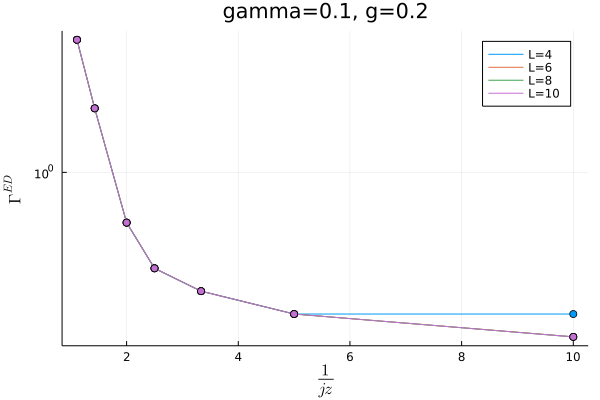

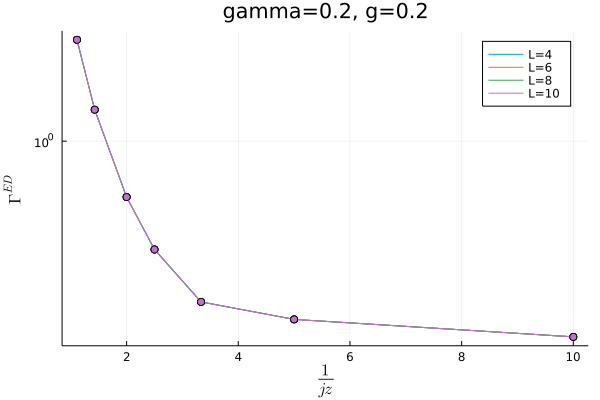

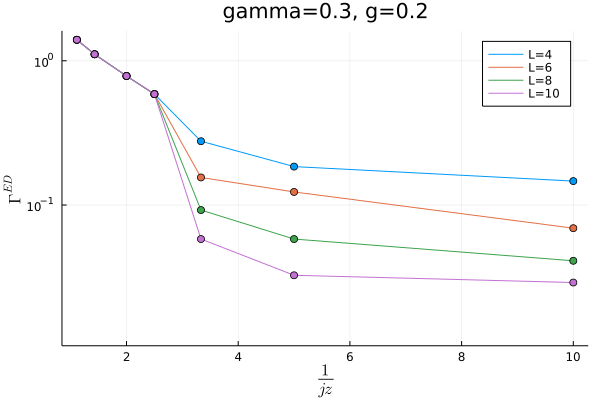

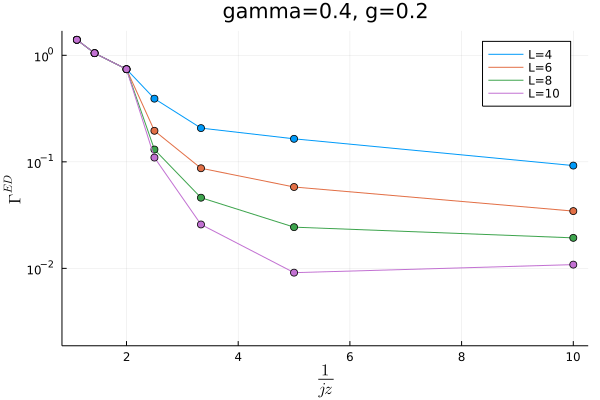

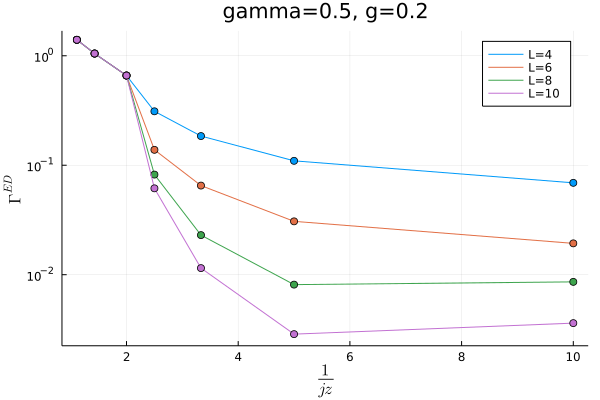

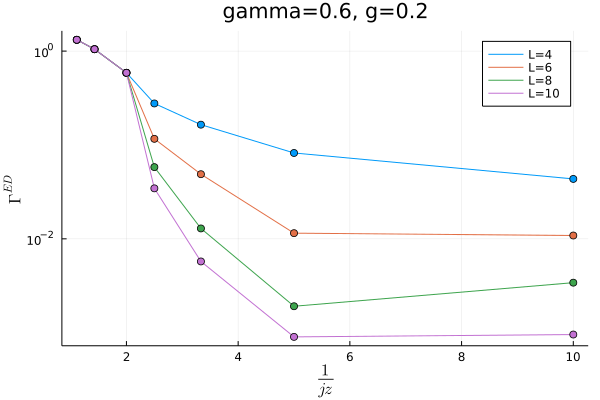

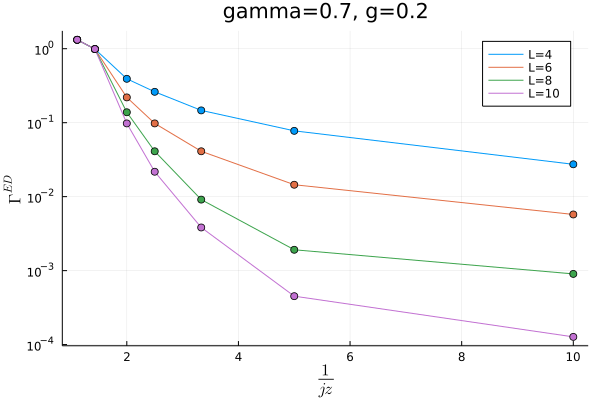

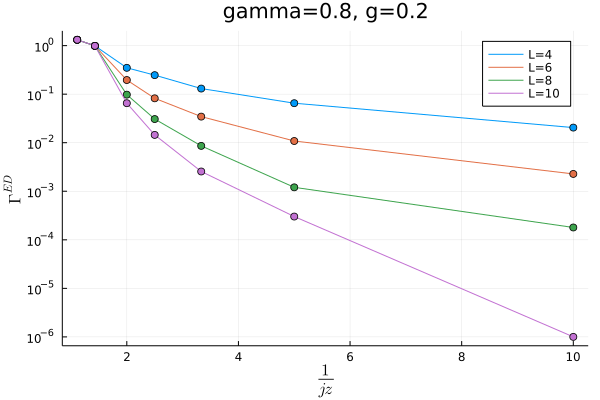

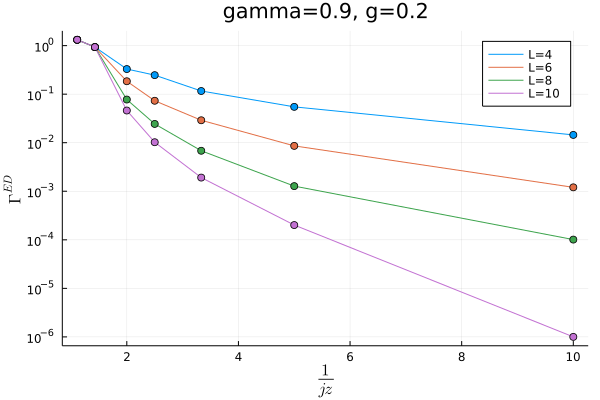

┌ Warning: No strict ticks found
└ @ PlotUtils /home/data/an3205/.julia/packages/PlotUtils/ebPq2/src/ticks.jl:295
┌ Warning: No strict ticks found
└ @ PlotUtils /home/data/an3205/.julia/packages/PlotUtils/ebPq2/src/ticks.jl:295
┌ Warning: No strict ticks found
└ @ PlotUtils /home/data/an3205/.julia/packages/PlotUtils/ebPq2/src/ticks.jl:295
┌ Warning: No strict ticks found
└ @ PlotUtils /home/data/an3205/.julia/packages/PlotUtils/ebPq2/src/ticks.jl:295


In [21]:
L_interested = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
L_interested = [4, 6, 8, 10]
jz_interested = jz_list
jz_interested_inv = 1.0 ./ jz_interested
gamma_interested = gamma_list
g_interested = g_list

gamma_eds2 = zeros( length(L_interested) )

g = 0.2

for (gamma_i, gamma) in enumerate(gamma_interested)
    gamma_eds = zeros( (length(jz_interested), length(L_interested)) )
    for (L_i, L) in enumerate(L_interested)
        
        
        for (jz_i, jz) in enumerate(jz_interested)
            gamma_ed = get_gamma_ed_from_ainf( Ainfs_dict[(L, jz, gamma, 0.2)], t_list, 2 ) 
            gamma_eds[jz_i, L_i] = gamma_ed
        end
    end
        
    display( Plots.plot( jz_interested_inv, 10^-6 .+gamma_eds ,
                xlabel=L"\frac{1}{jz}", ylabel=L"\Gamma^{ED}",
                title="gamma="*string(gamma)*", g="*string(g), 
                label = "L=".*string.(L_interested'), m=:dot, yaxis=:log)
            )
    
end

# Plotting $\Gamma^{ED}$ vs system size L to ensure convergence

In [15]:
jz = 0.6
gamma = 0.1

L_interested = [2, 4, 6, 8, 10, 12]
jz_interested = jz_list
gamma_interested = gamma_list
# gamma_interested = [0.1]

gamma_eds2 = zeros( length(L_interested) )

for (gamma_i, gamma) in enumerate(gamma_interested)
    for (jz_i, jz) in enumerate(jz_interested)
        gamma_eds = zeros( length(L_interested) )
        for (L_i, L) in enumerate(L_interested)
            gamma_ed = get_gamma_ed_from_ainf( Ainfs_dict[(L, jz, gamma)], t_list, 2 ) 
            gamma_eds[L_i] = gamma_ed
        end
        display( Plots.plot( L_interested, gamma_eds ,
                xlabel="System Size (L)", ylabel=L"\Gamma^{ED}",
                title="gamma="*string(gamma)*", jz="*string(jz), 
                xticks=L_interested,
                yrange=[-0.1,1], m=:dot, c=:black, )
            )
    end
end

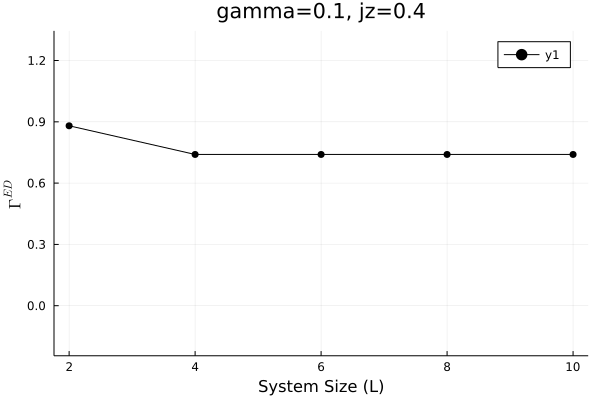

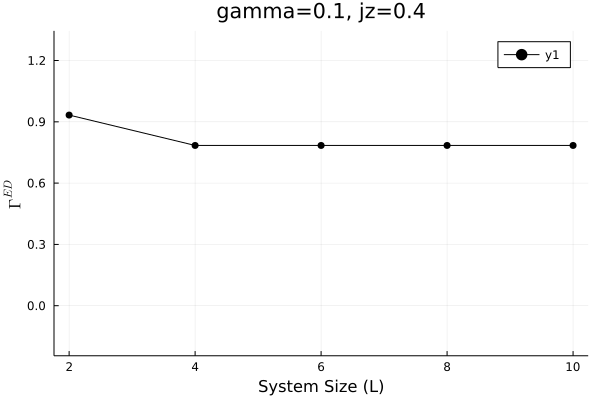

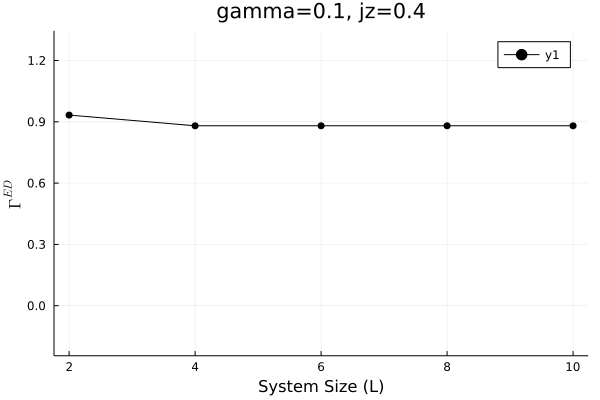

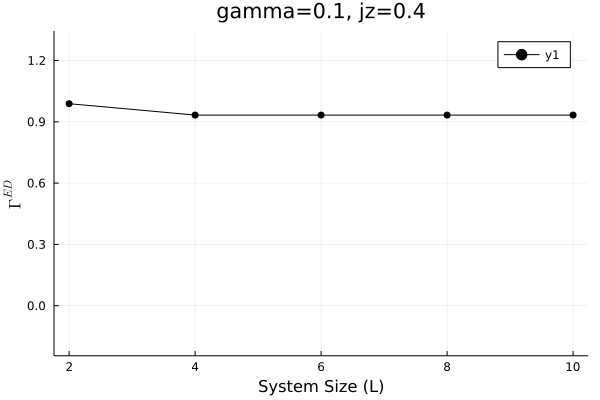

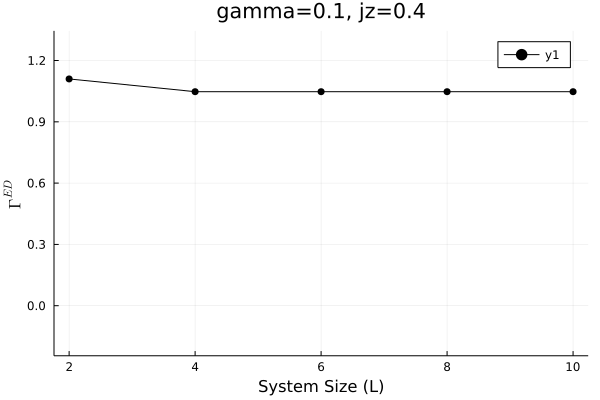

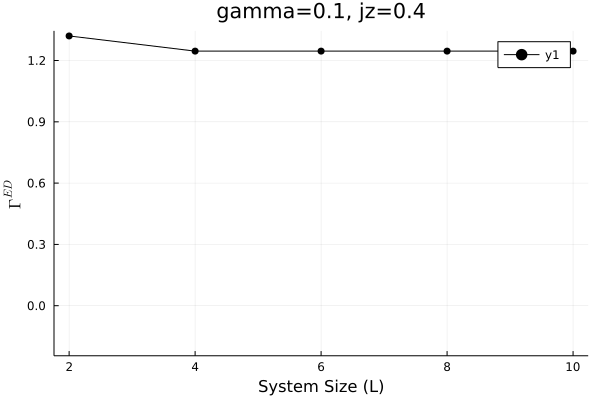

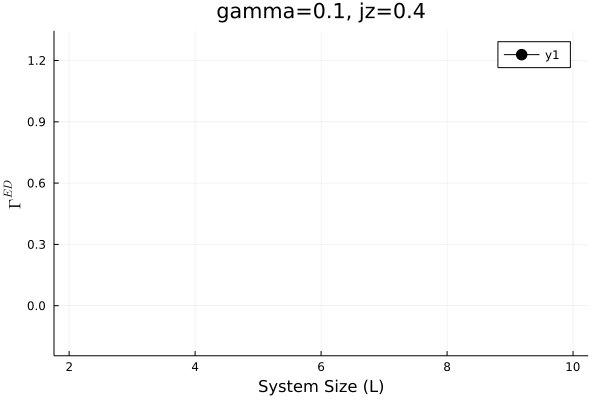

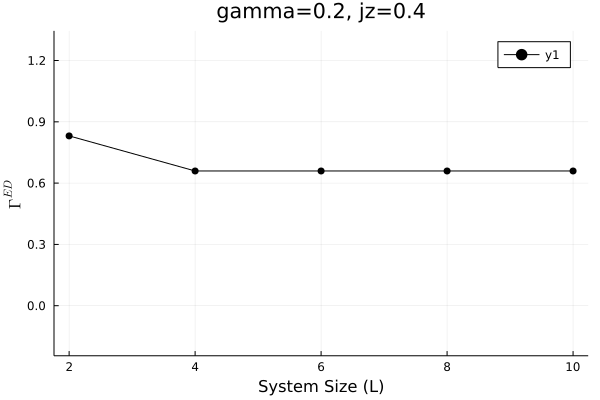

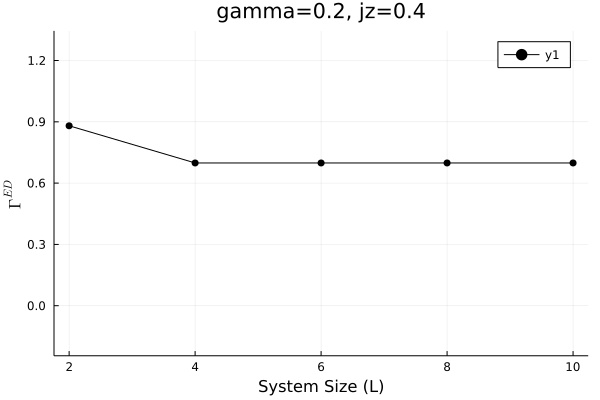

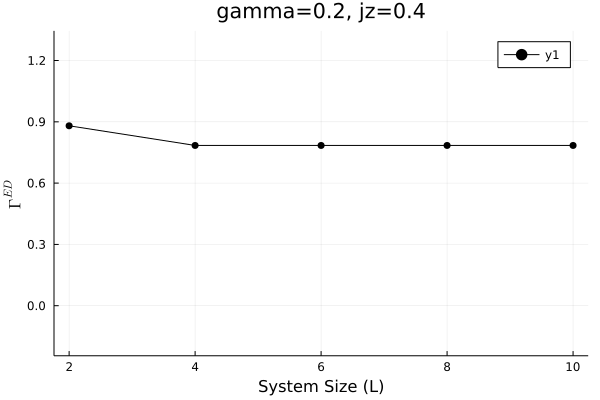

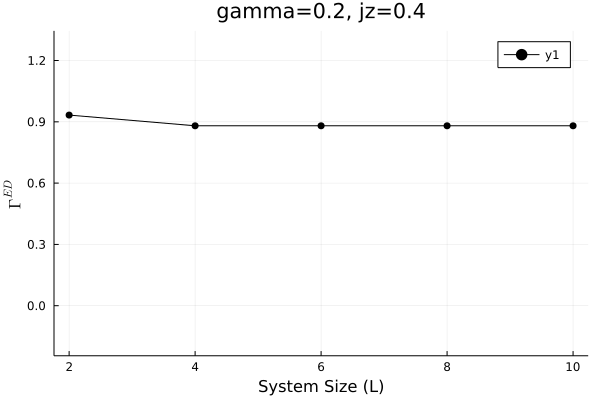

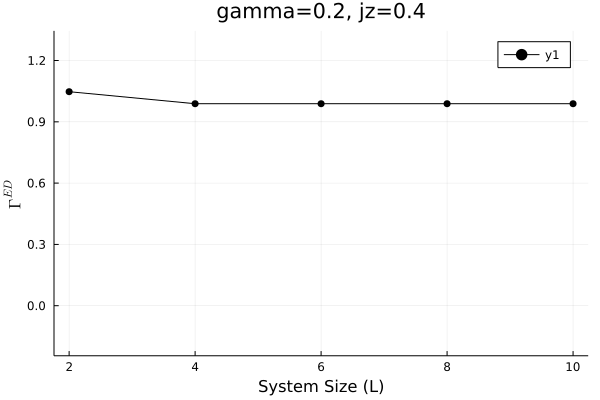

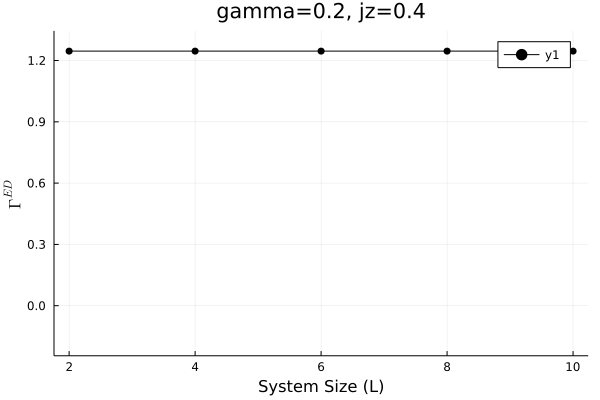

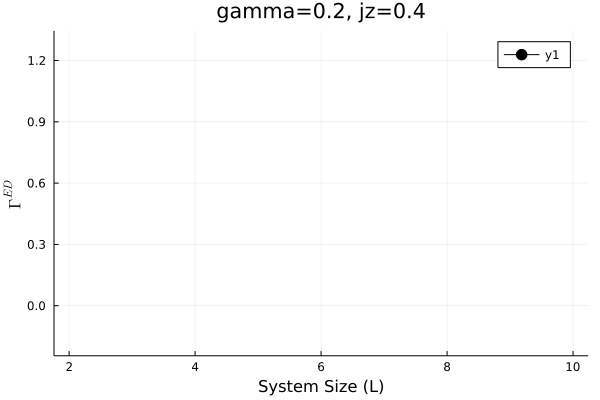

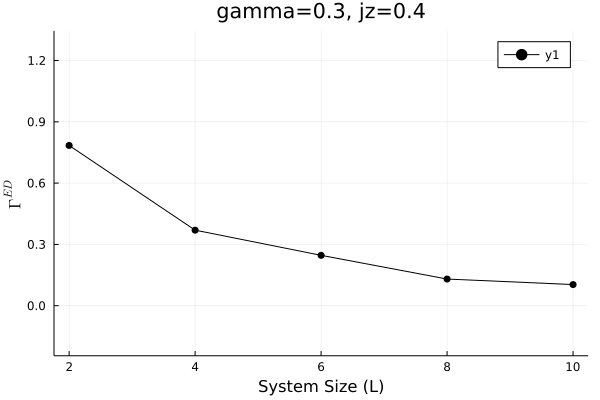

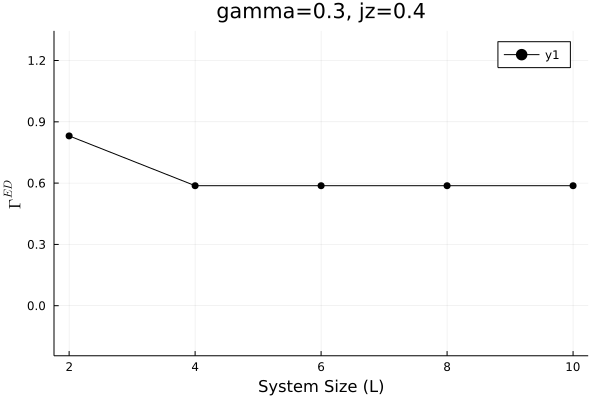

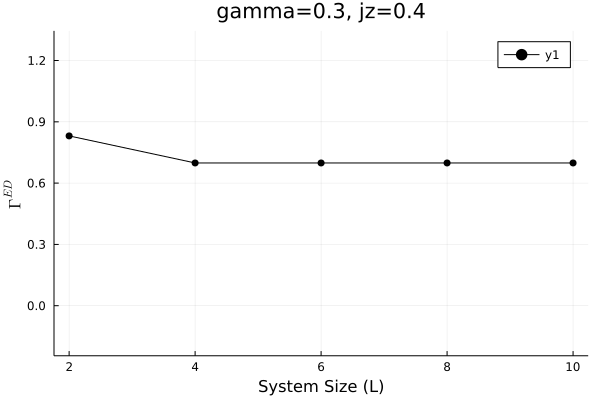

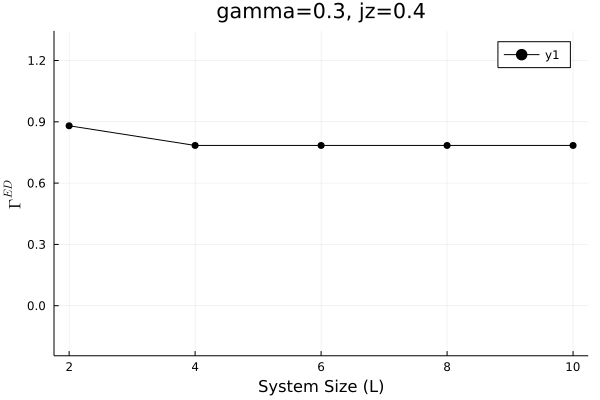

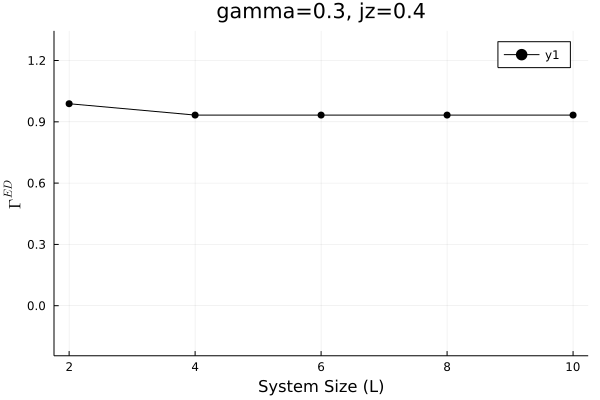

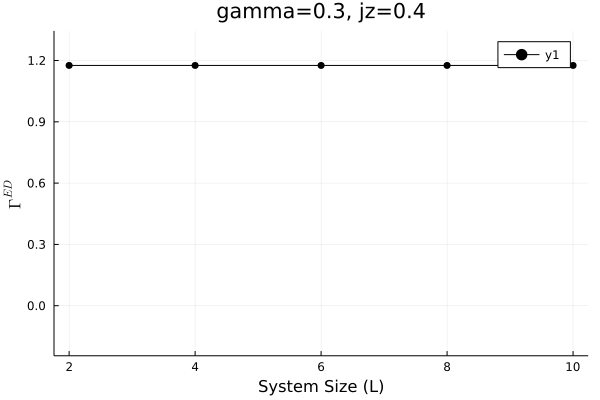

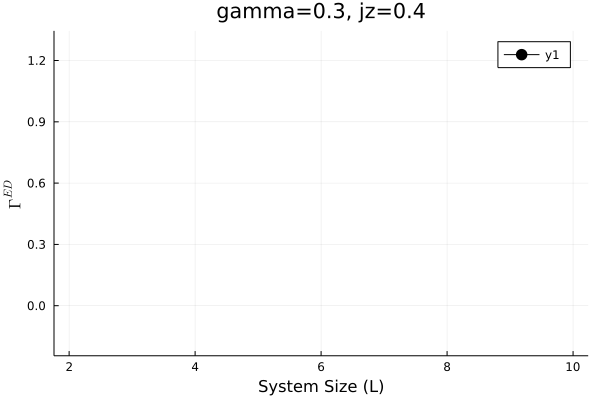

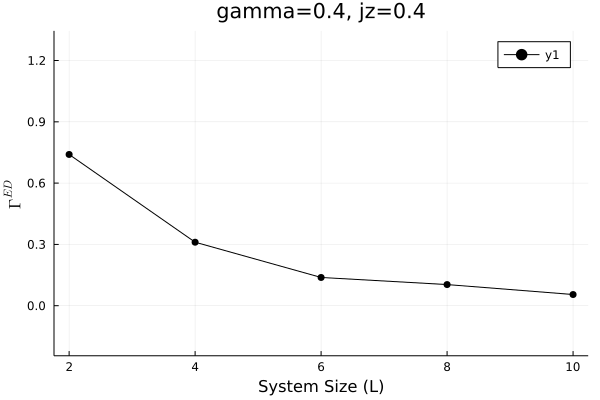

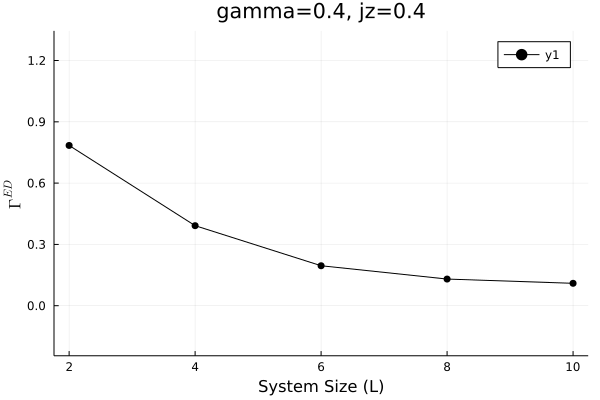

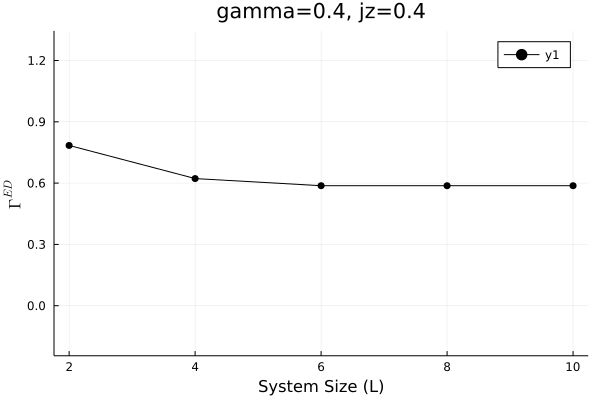

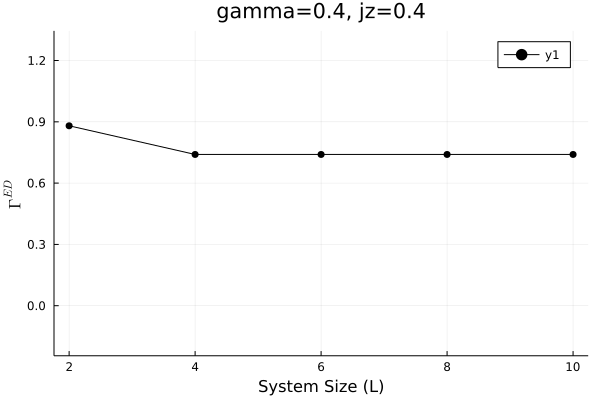

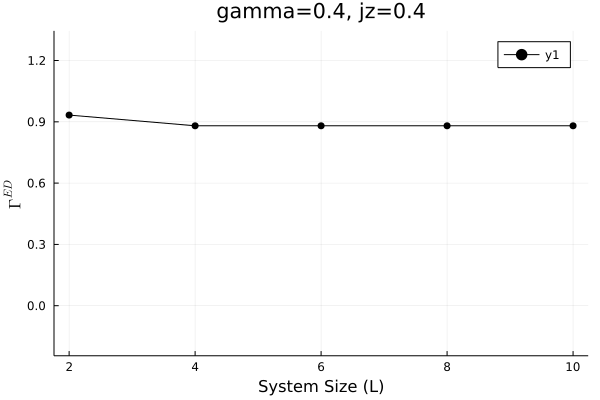

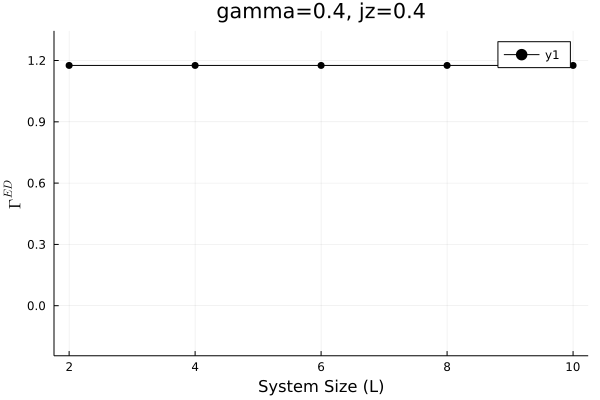

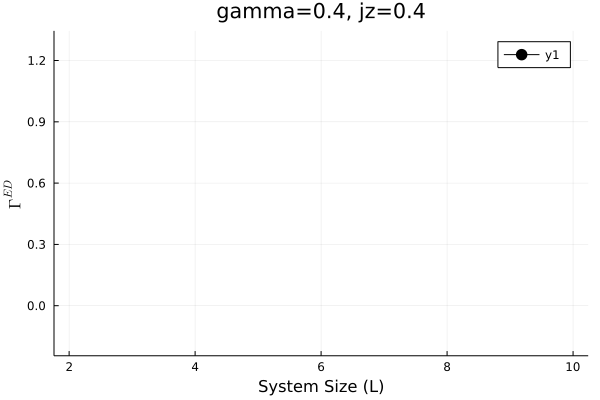

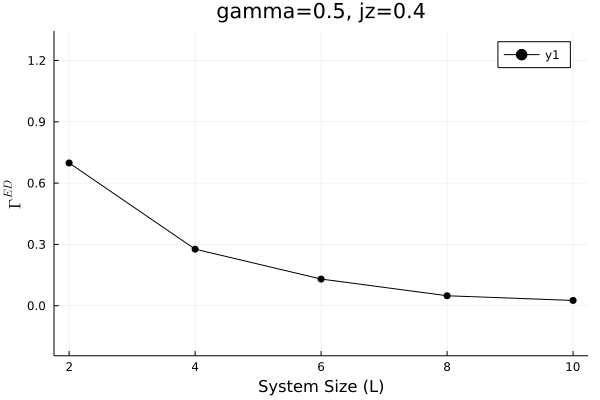

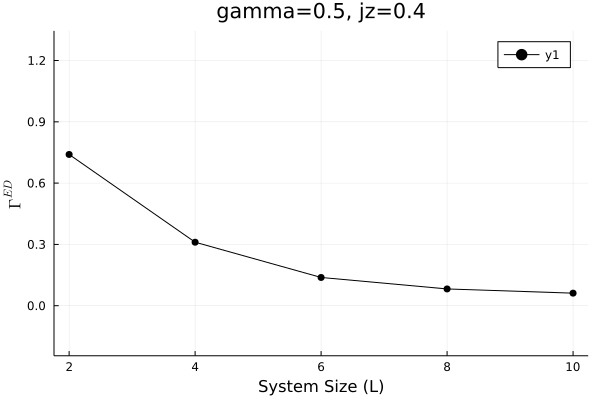

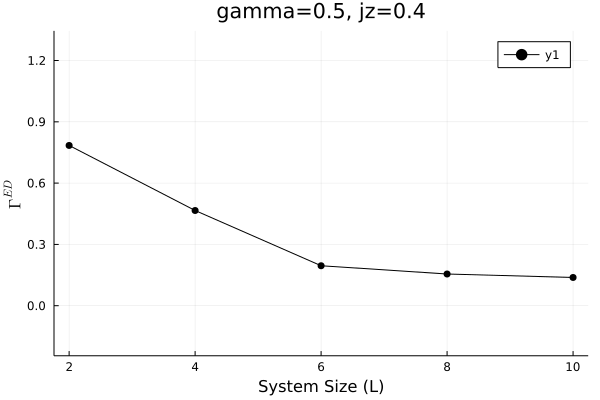

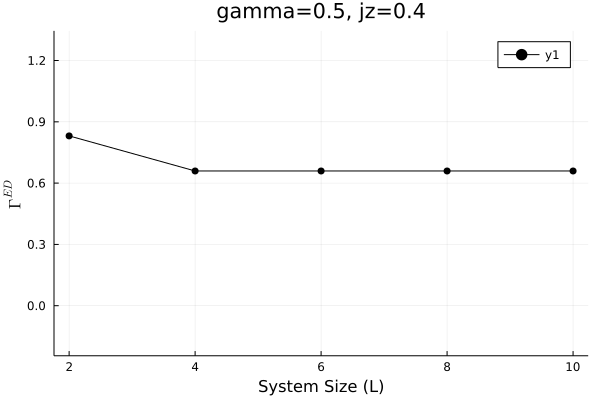

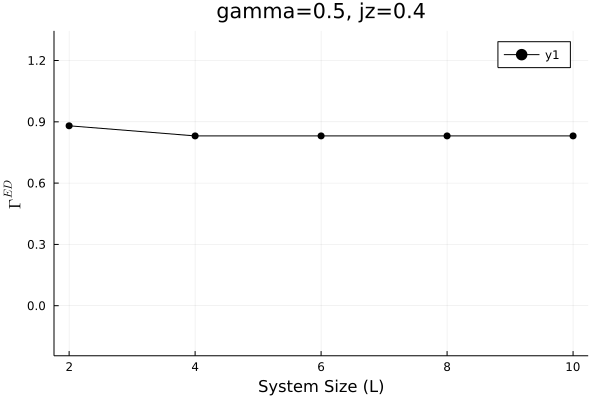

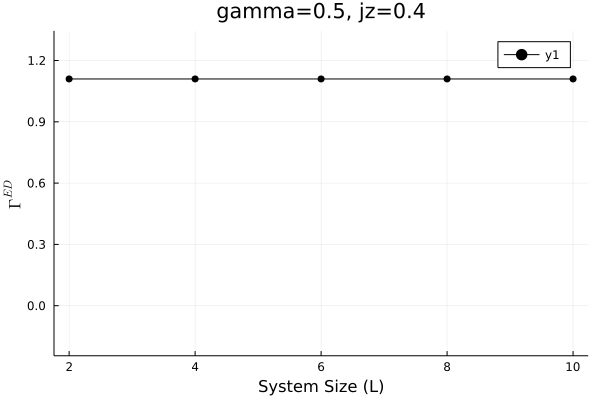

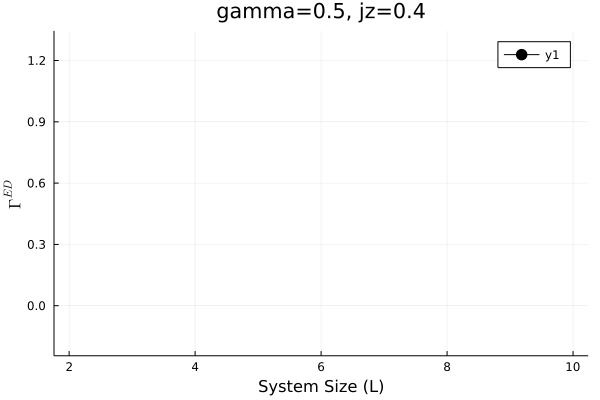

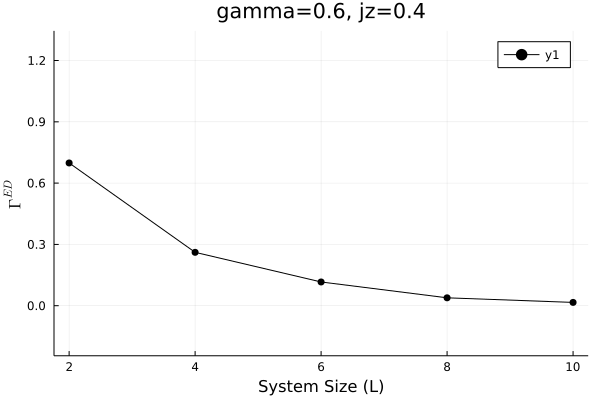

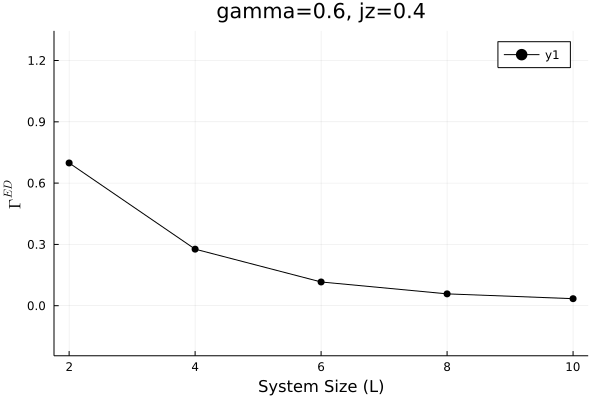

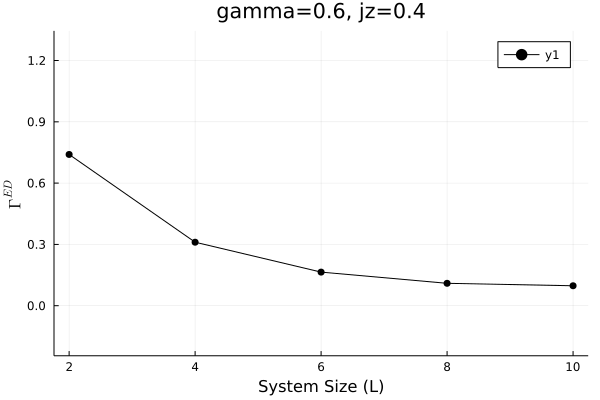

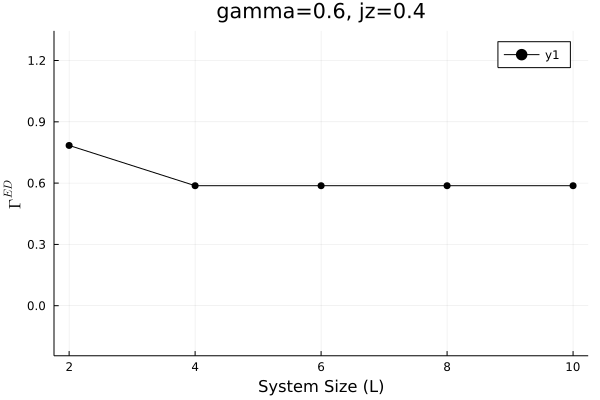

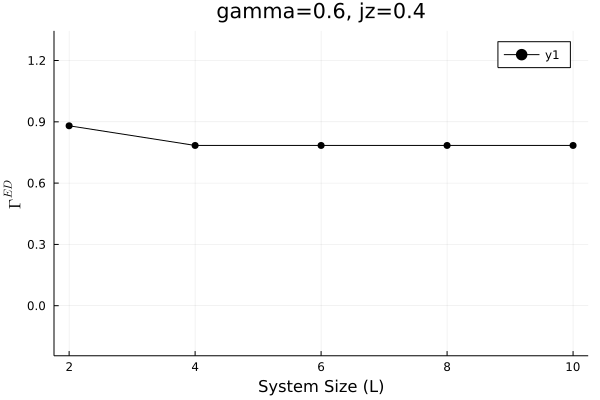

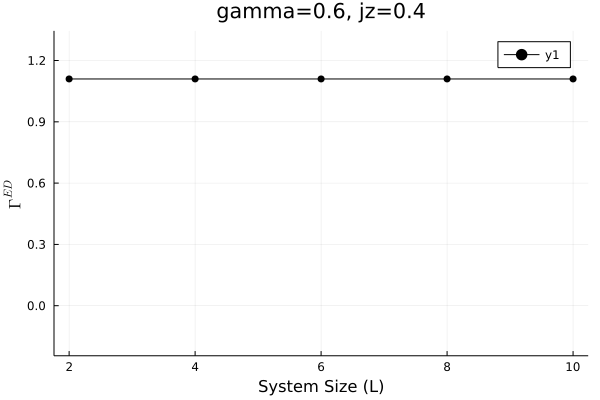

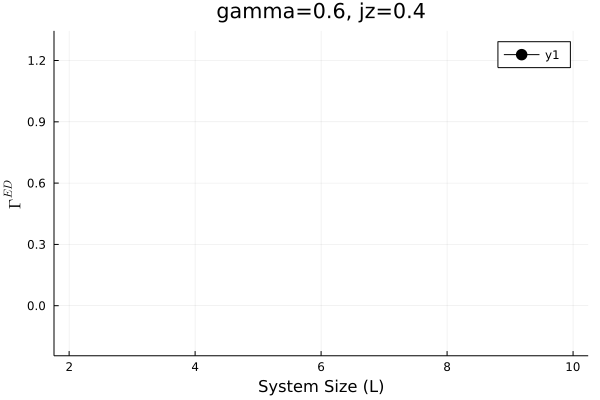

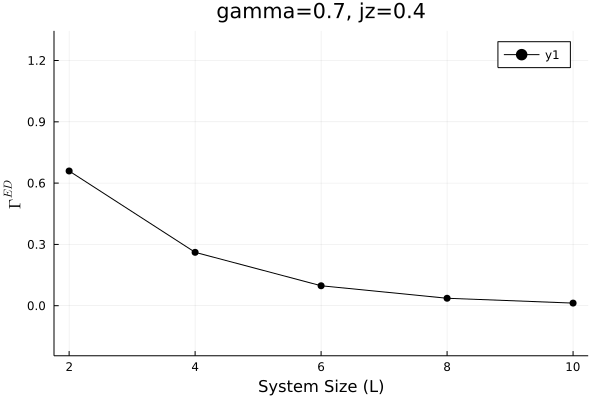

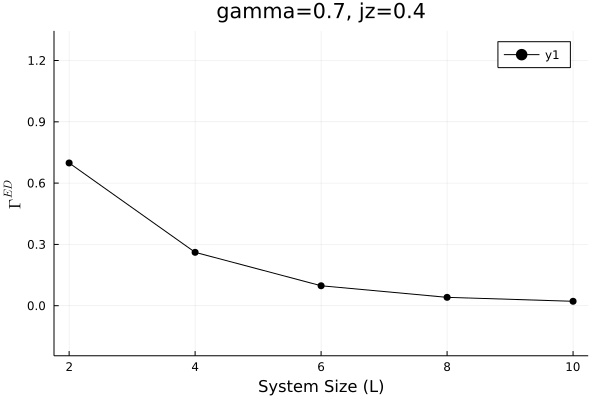

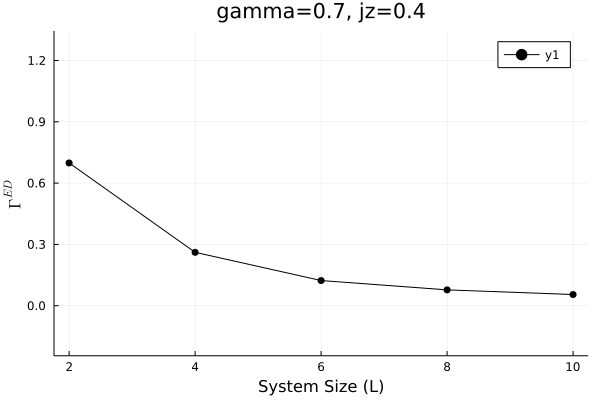

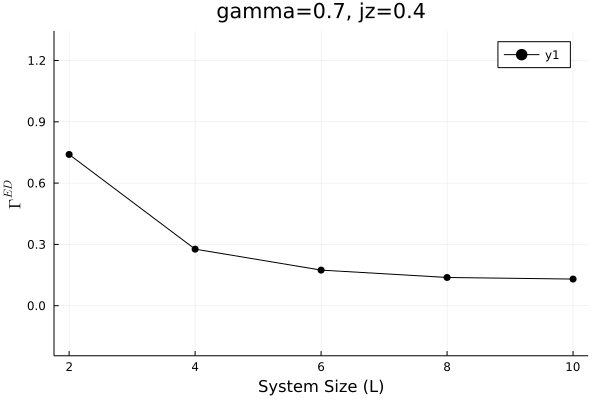

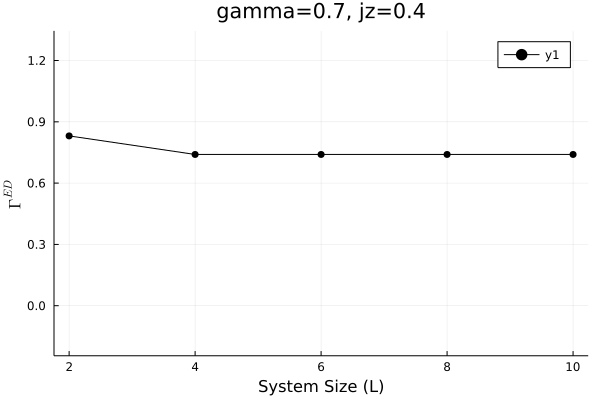

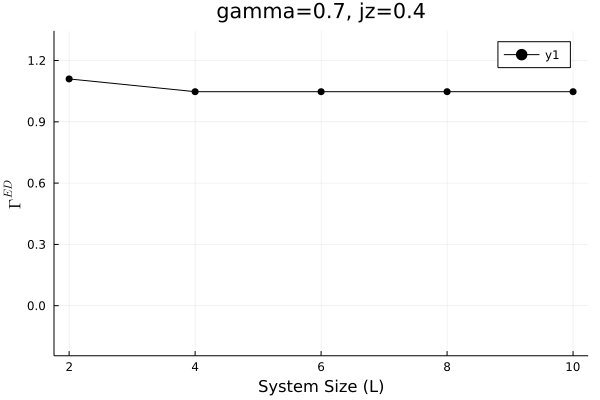

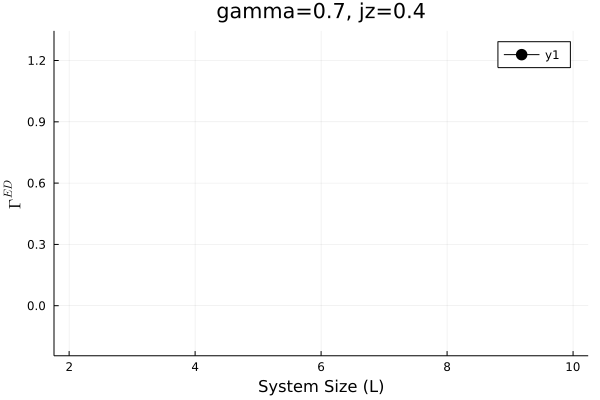

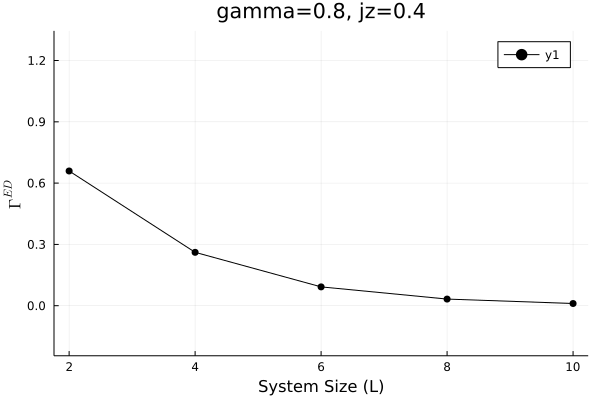

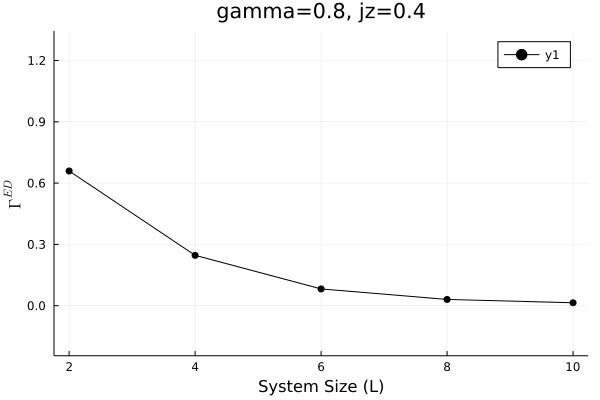

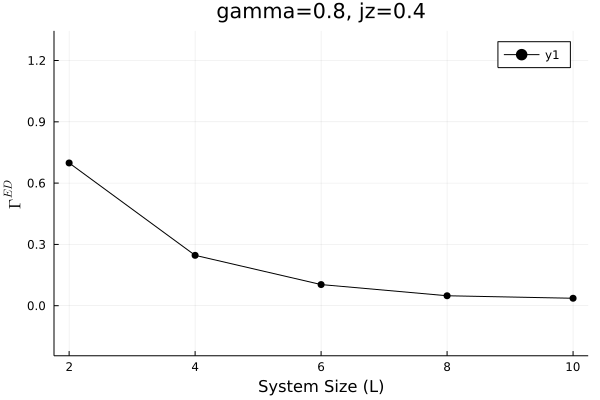

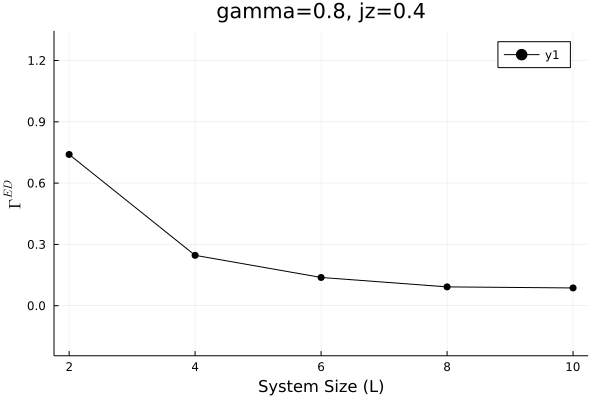

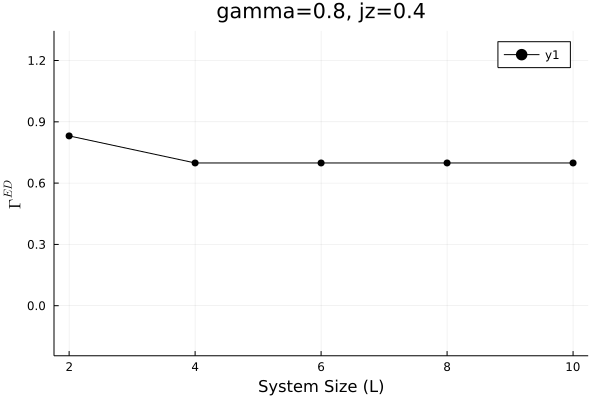

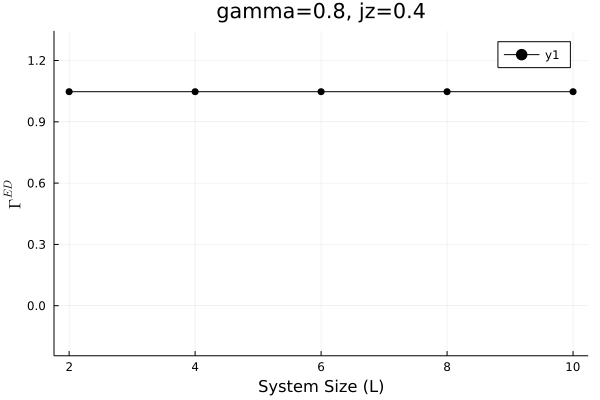

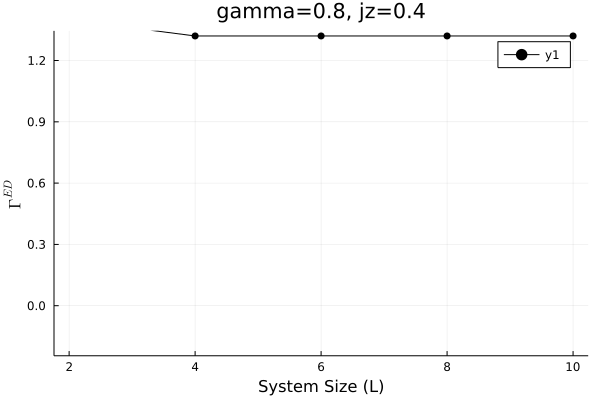

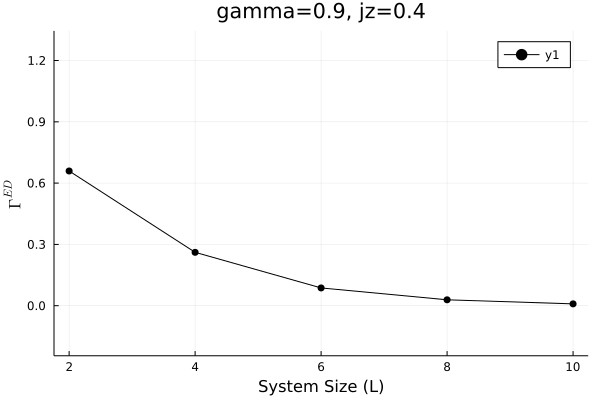

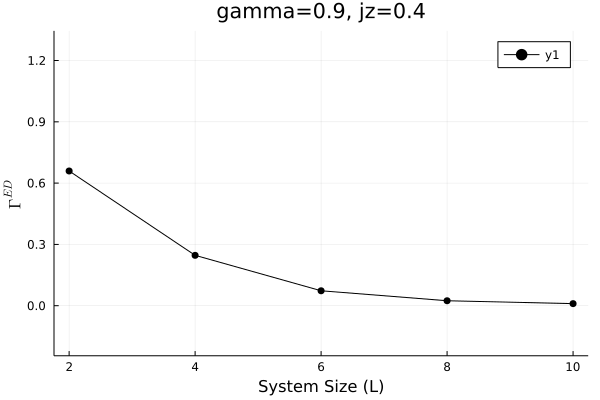

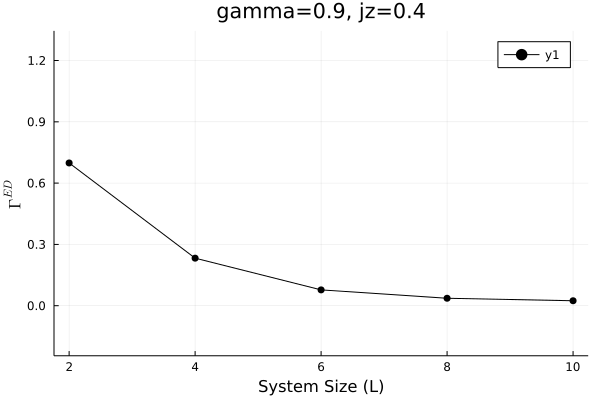

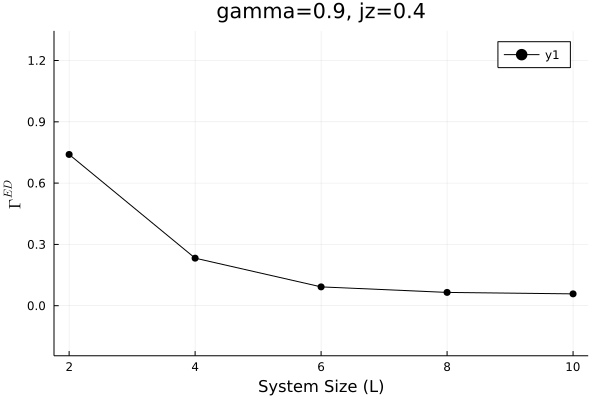

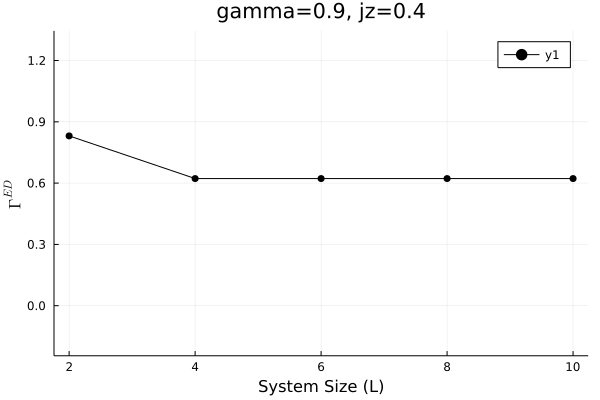

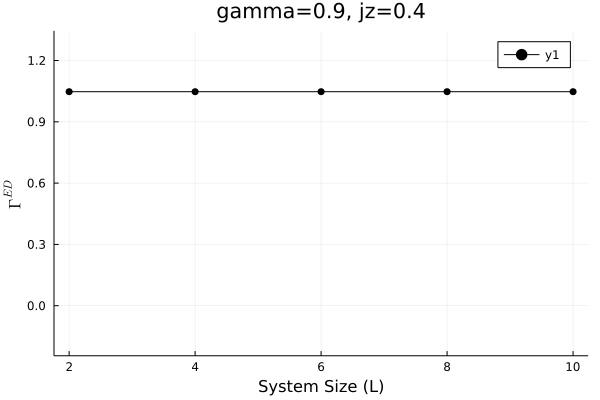

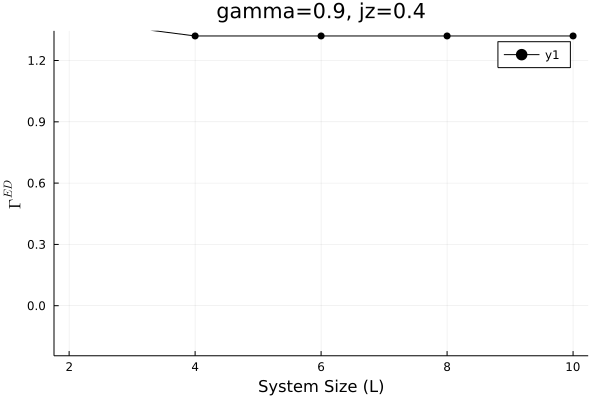

In [28]:
jz = 0.6
gamma = 0.1

L_interested = [2, 4, 6, 8, 10]
jz_interested = jz_list
gamma_interested = gamma_list
# gamma_interested = [0.1]
g_interested = g_list

gamma_eds2 = zeros( length(L_interested) )

jz = 0.4

for (gamma_i, gamma) in enumerate(gamma_interested)
    for (g_i, g) in enumerate(g_interested)
        gamma_eds = zeros( length(L_interested) )
        for (L_i, L) in enumerate(L_interested)
            gamma_ed = get_gamma_ed_from_ainf( Ainfs_dict[(L, jz, gamma, g)], t_list, 2 ) 
            gamma_eds[L_i] = gamma_ed
        end
        display( Plots.plot( L_interested, gamma_eds ,
                xlabel="System Size (L)", ylabel=L"\Gamma^{ED}",
                title="gamma="*string(gamma)*", jz="*string(jz), 
                xticks=L_interested,
                yrange=[-0.2,1.3], m=:dot, c=:black, )
            )
    end
end

# Plotting $A_{inf}$ vs time

In [64]:
L_list_test = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
L_list_test = [ 4, 8, 12]
jz_interested = jz_list
gamma_interested = gamma_list

jz = 0.2
gamma = 0.9

Ls_plot = zeros( (length(L_list_test), length(Ainfs_dict[( 2, 0.1, 0.1)])) )

for (L_i, L) in enumerate(L_list_test)
    Ls_plot[L_i, :] = Ainfs_dict[( L, jz, gamma)]
end

Plots.plot( t_list, Ls_plot', xaxis=:log,
            xlabel="time (s)", ylabel="A_inf",
            title="A_inf for gamma="*string(gamma)*", jz="*string(jz), 
            label = "L=".*string.(L_list_test'))
hline!([exp(-1)], linestyle=:dash, color=:black, label="")

In [63]:
L_list_test = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
L_list_test = [ 4, 8, 12]
jz_interested = jz_list
gamma_interested = gamma_list

jz = 0.2
gamma = 0.9

Ls_plot = zeros( (length(L_list_test), length(Ainfs_dict[
                ( 2, jz_interested[1], gamma_interested[1])])) )

for (gamma_i, gamma) in enumerate(gamma_interested)
    for (jz_i, jz) in enumerate(jz_interested)
        for (L_i, L) in enumerate(L_list_test)
            Ls_plot[L_i, :] = Ainfs_dict[( L, jz, gamma)]
        end
        display(
            Plots.plot( t_list, Ls_plot', xaxis=:log,
                xlabel="time (s)", ylabel="A_inf",
                title="A_inf for gamma="*string(gamma)*", jz="*string(jz), 
                label = "L=".*string.(L_list_test'))
#             hline!([exp(-1)], linestyle=:dash, color=:black, label="")
            )
        
    end
end

In [10]:
jz_list

8-element Vector{Float64}:
 0.0
 0.1
 0.2
 0.3
 0.4
 0.5
 0.7
 0.9

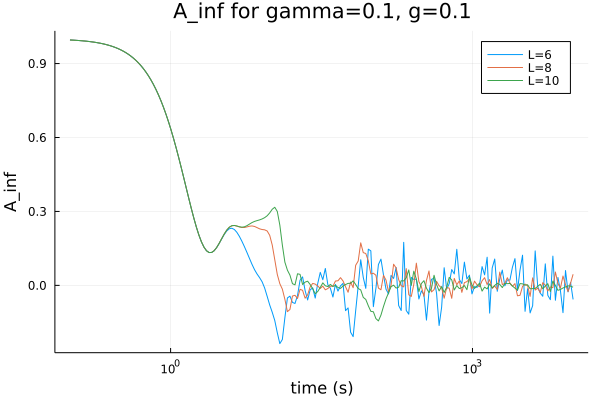

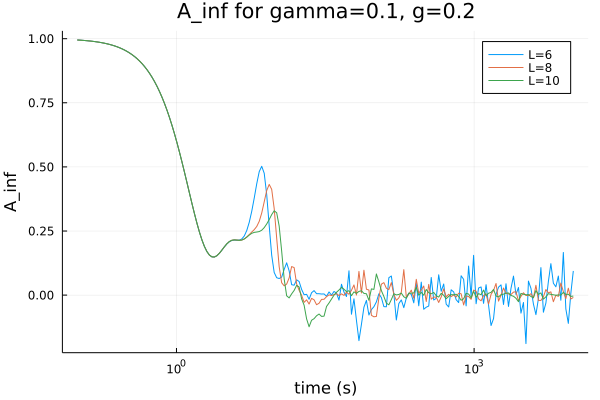

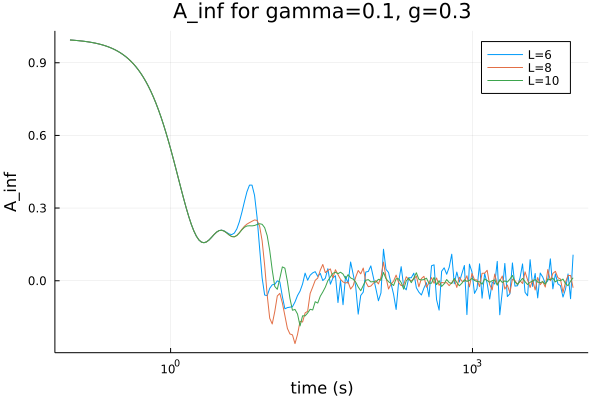

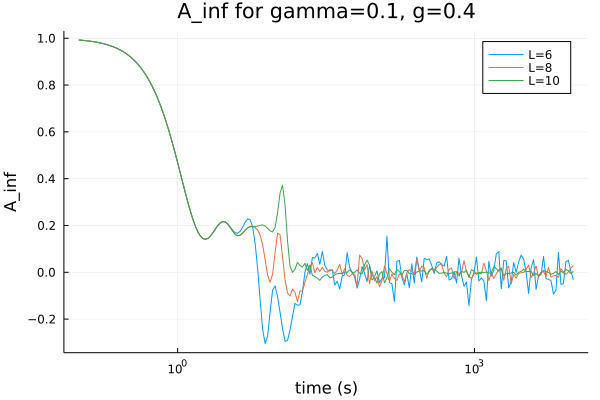

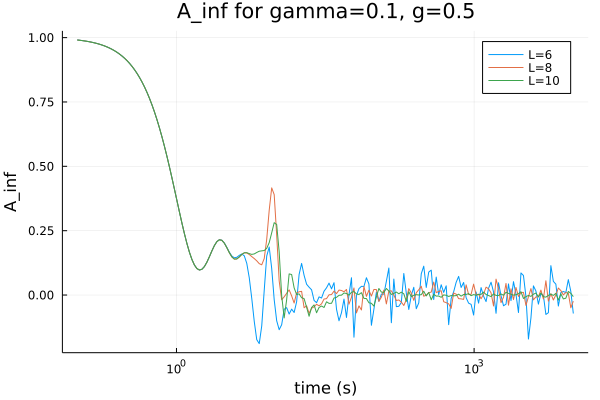

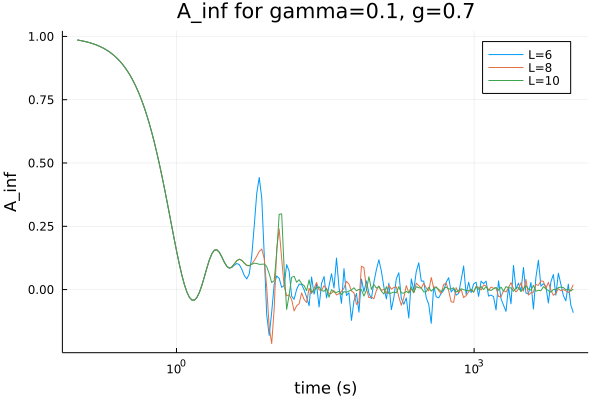

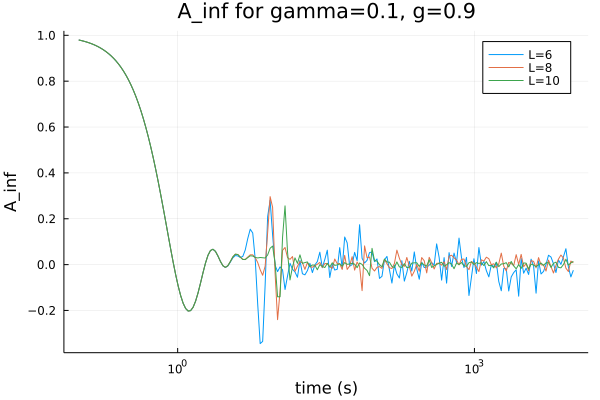

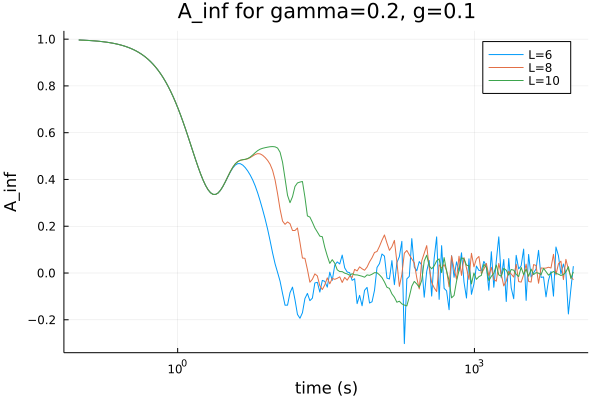

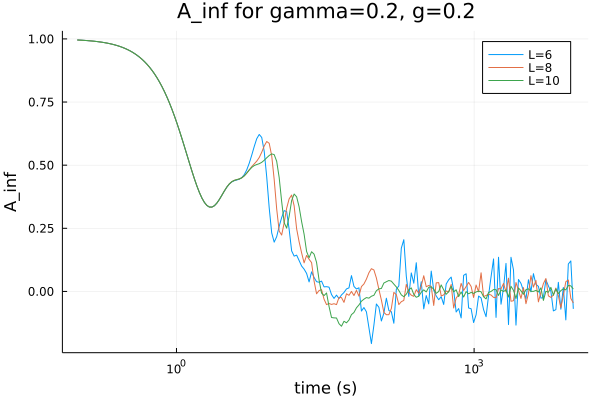

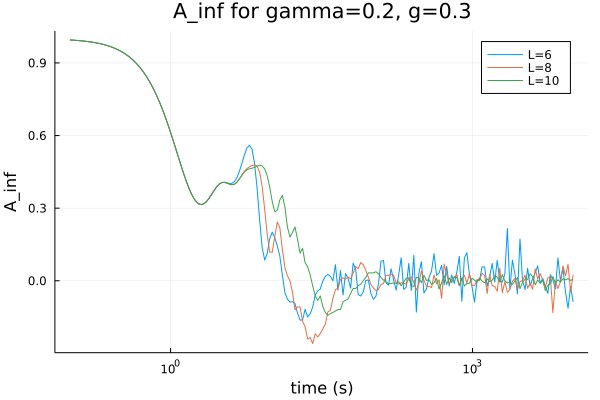

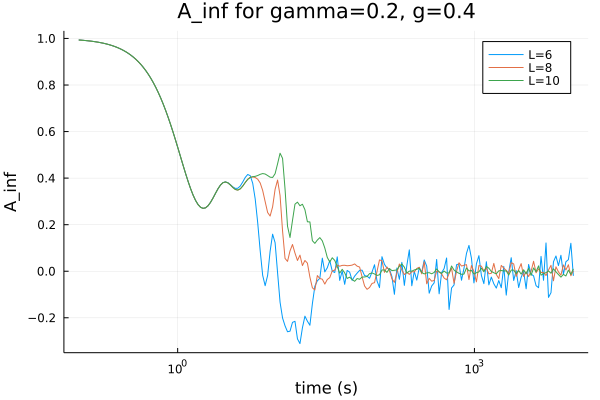

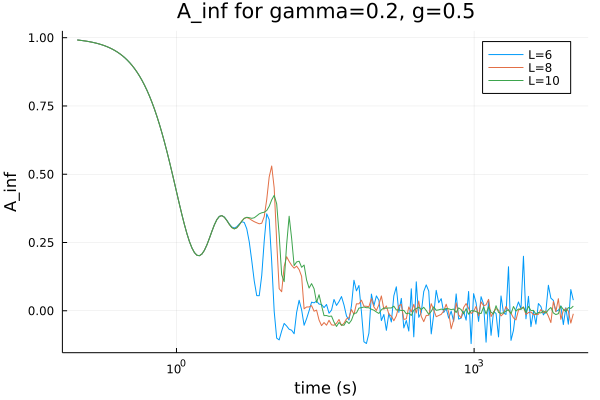

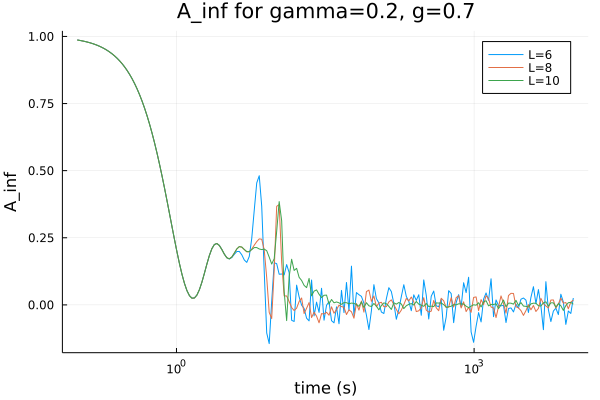

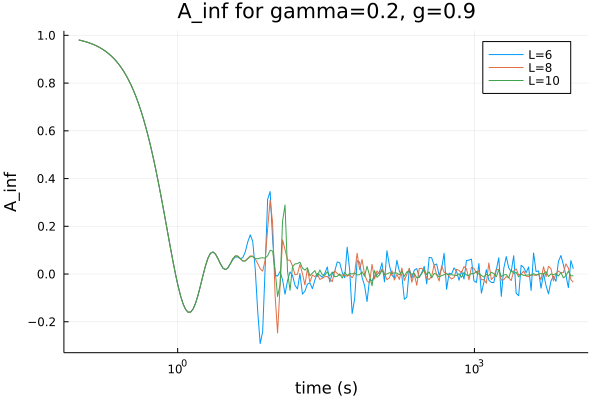

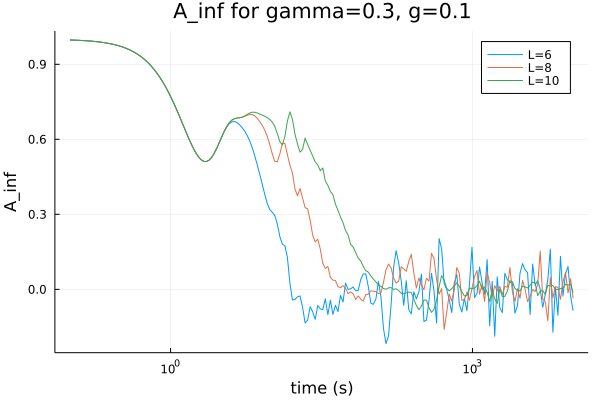

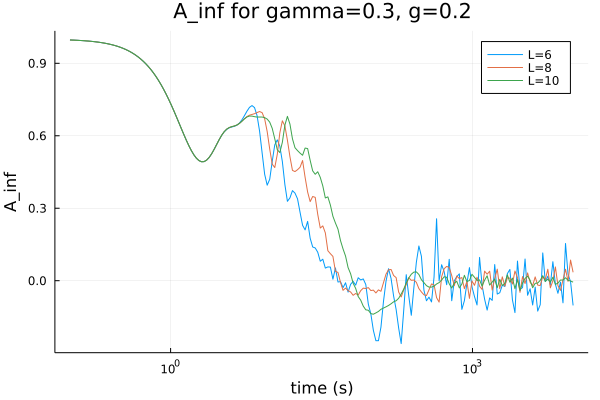

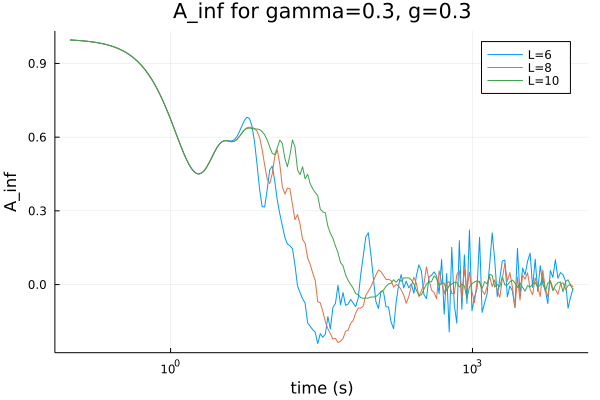

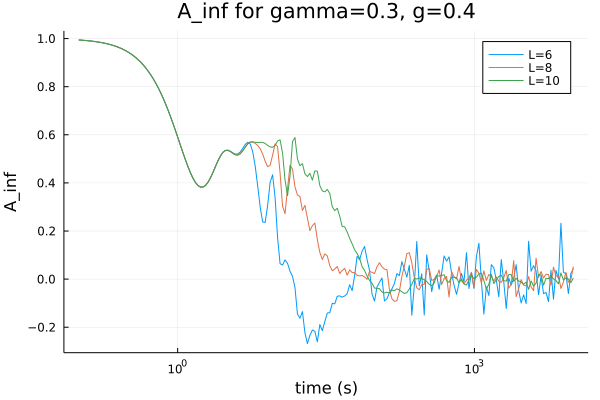

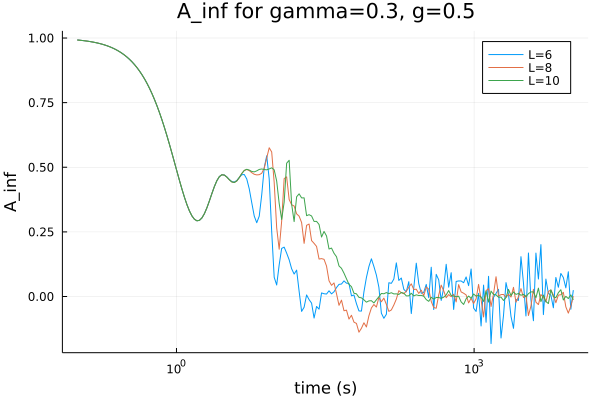

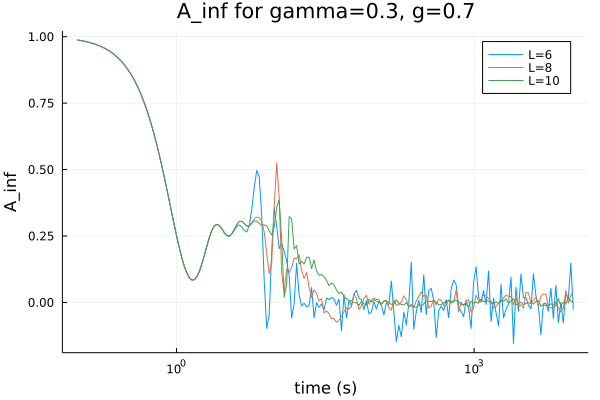

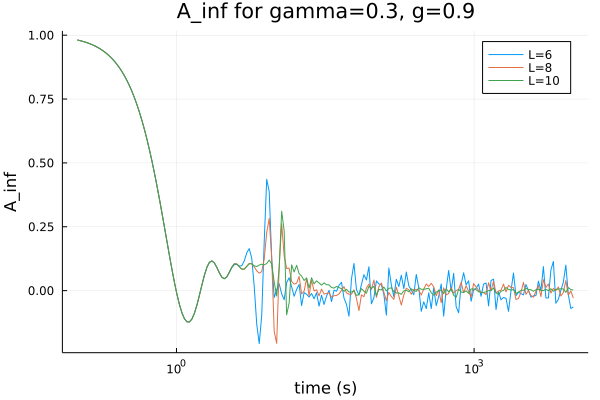

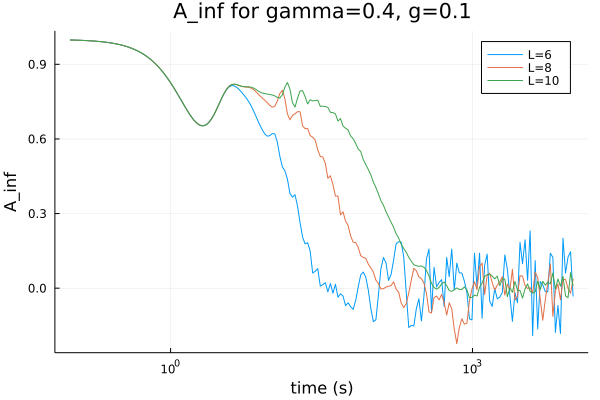

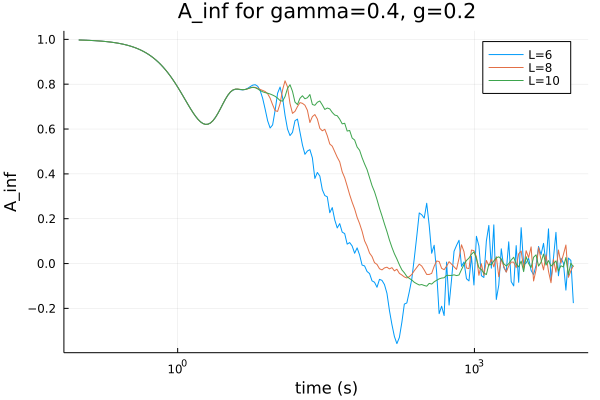

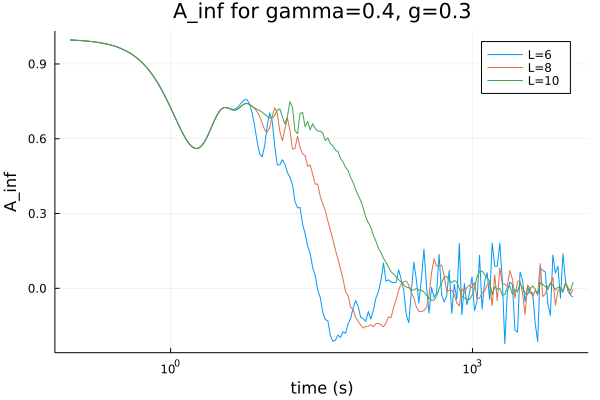

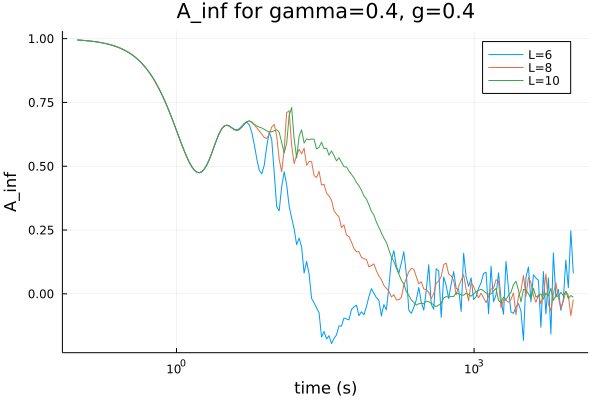

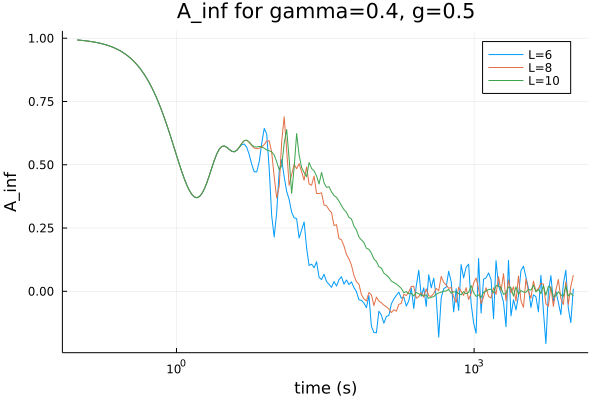

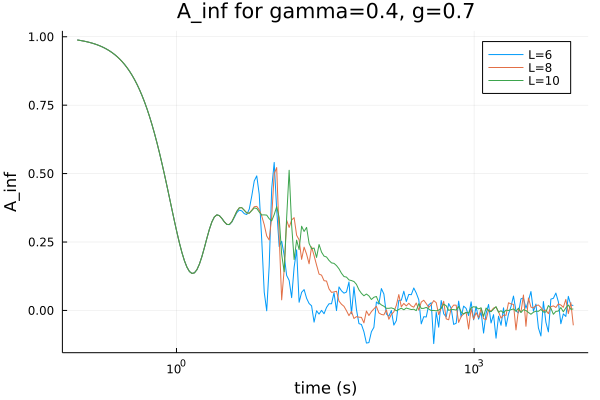

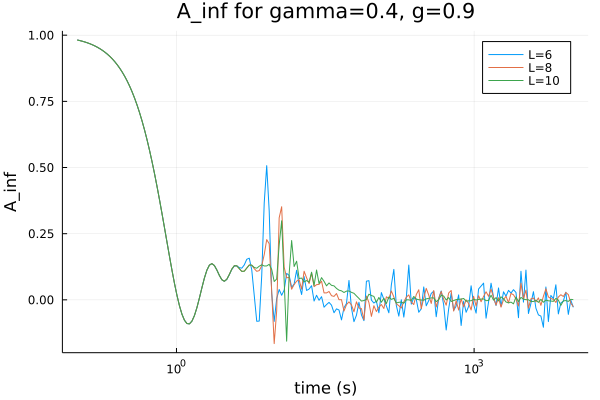

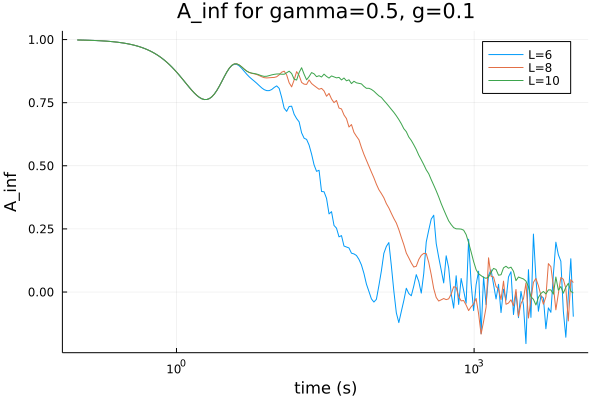

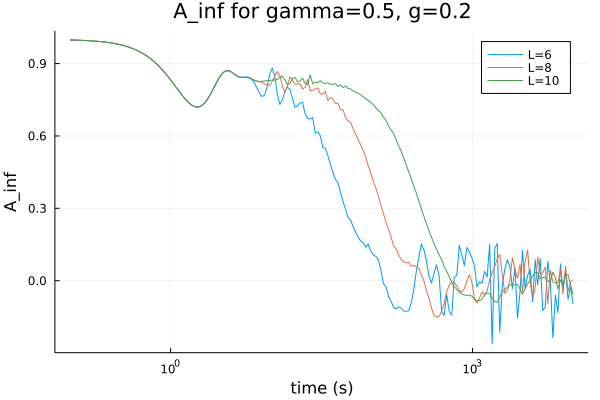

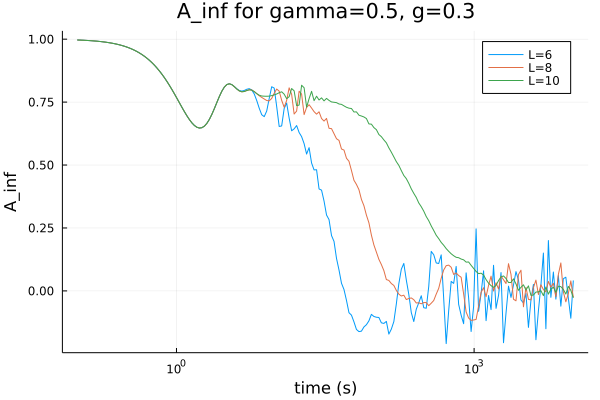

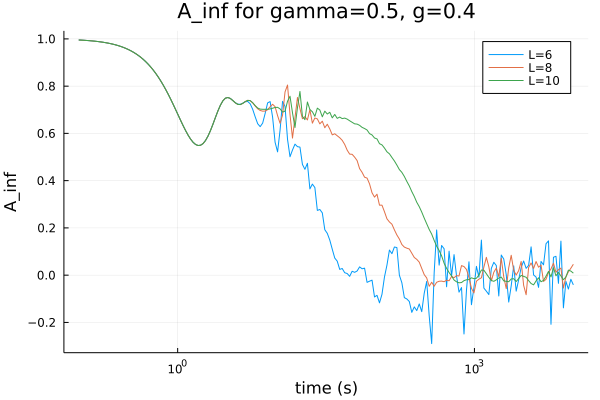

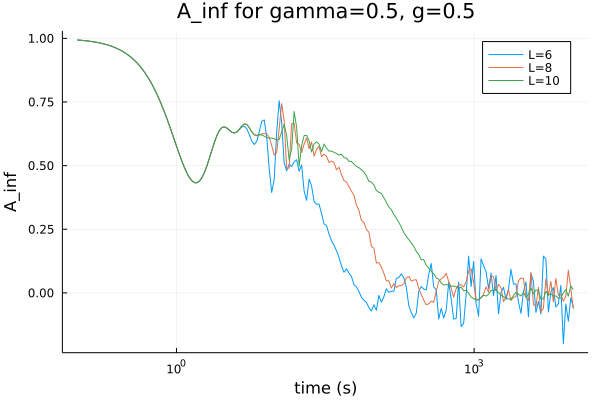

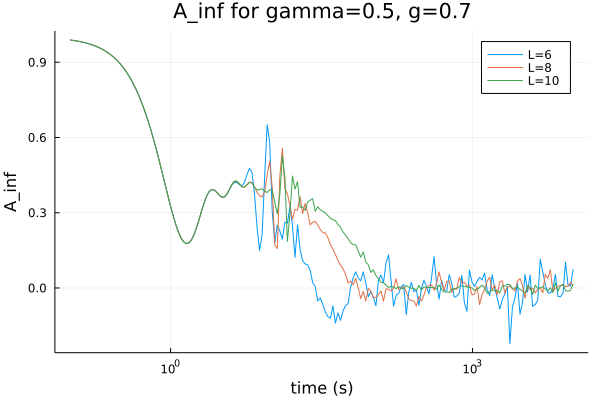

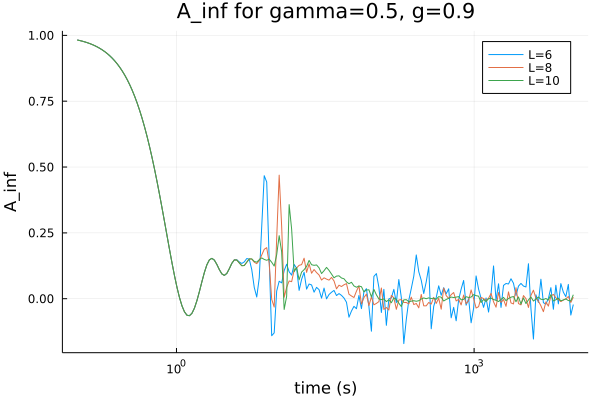

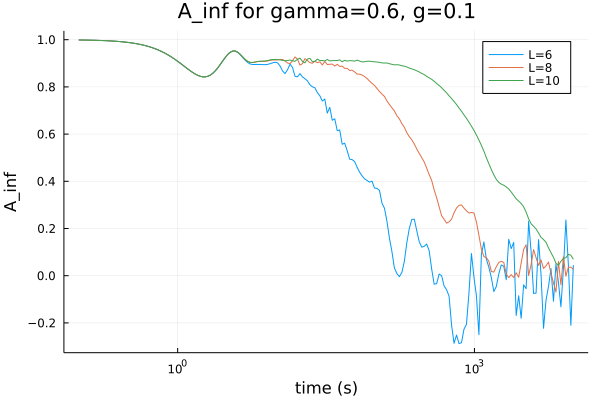

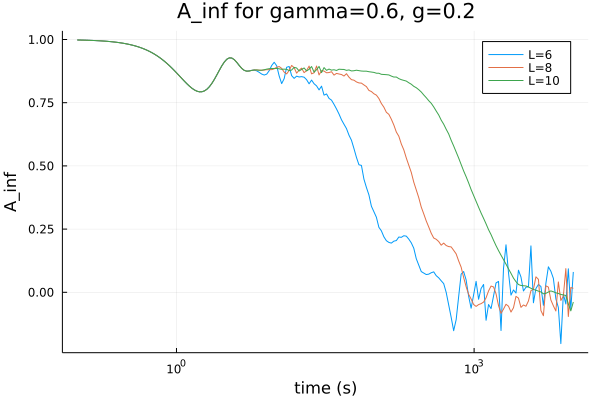

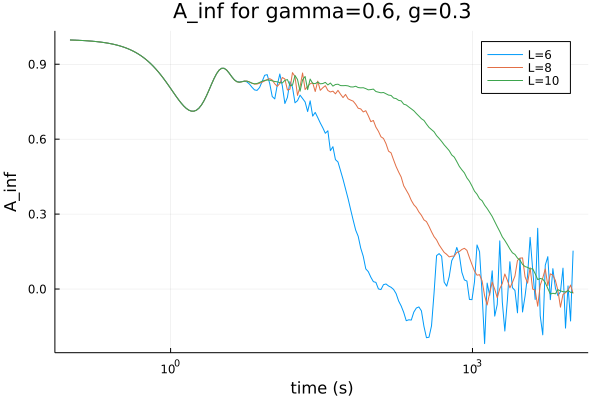

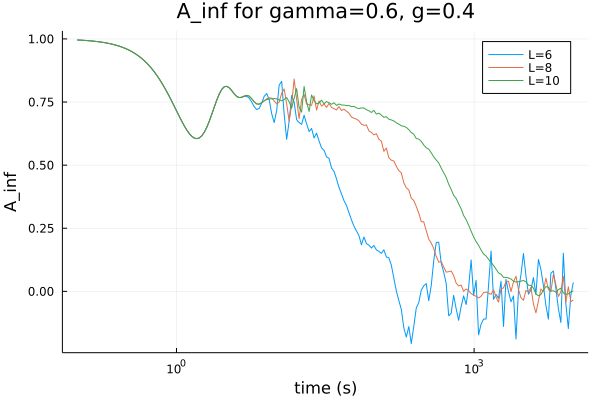

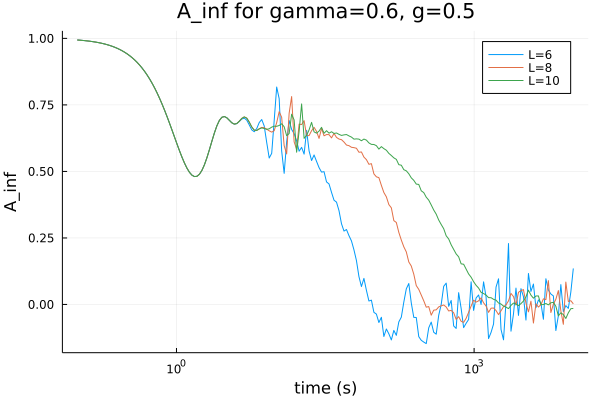

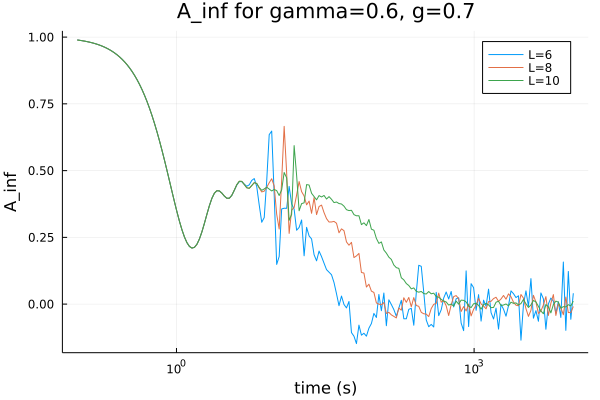

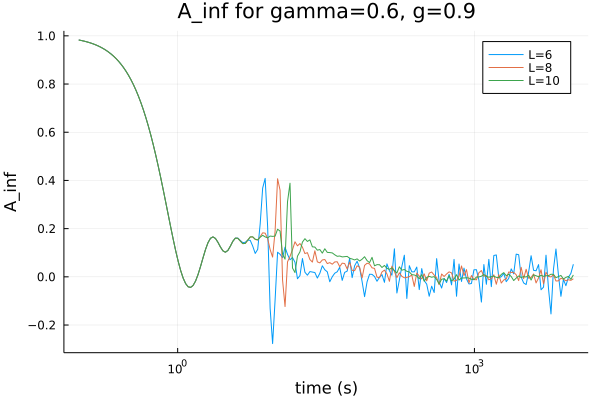

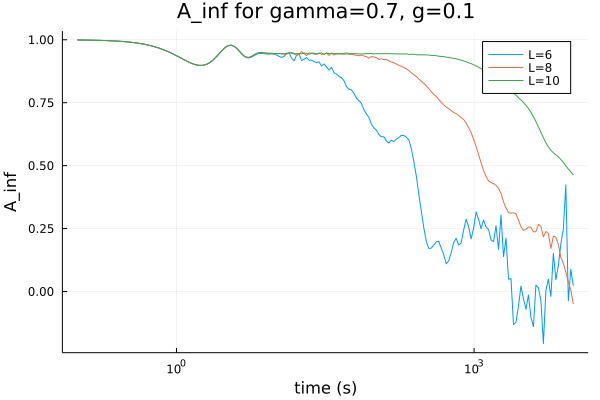

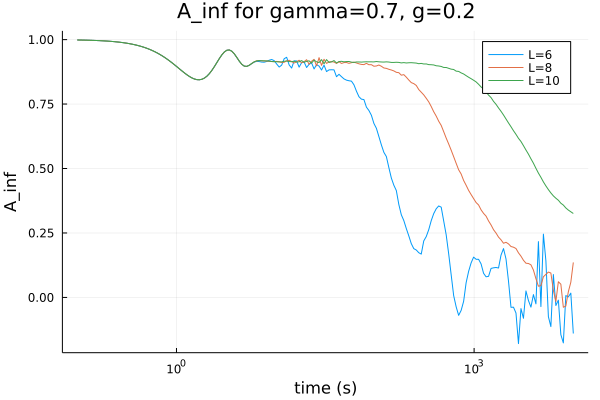

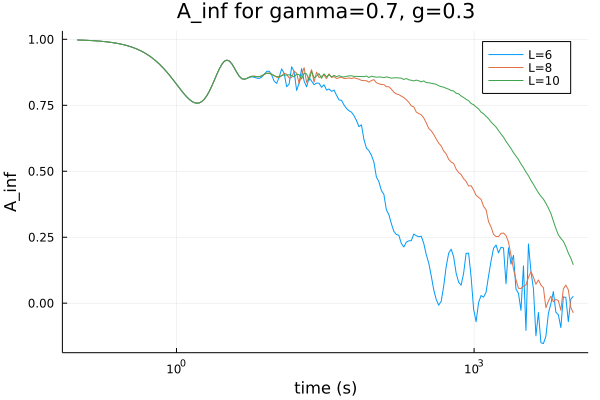

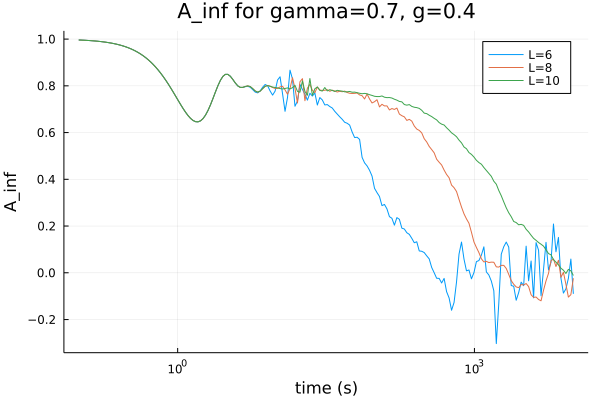

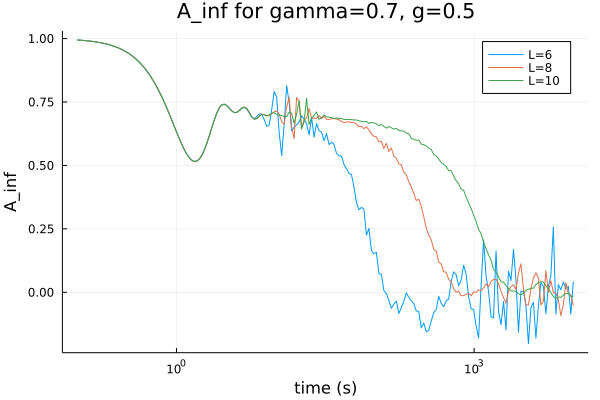

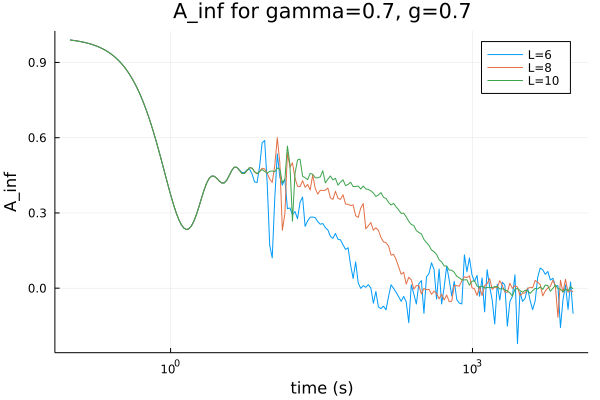

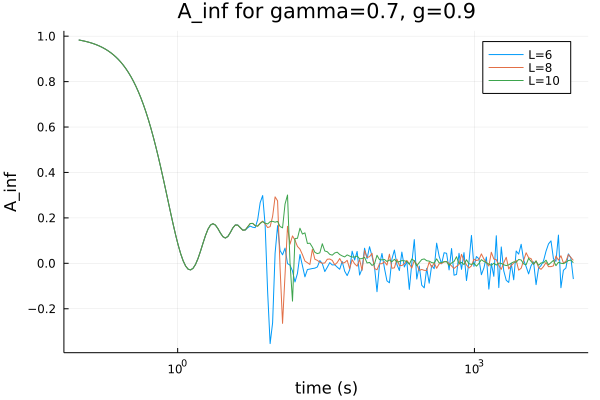

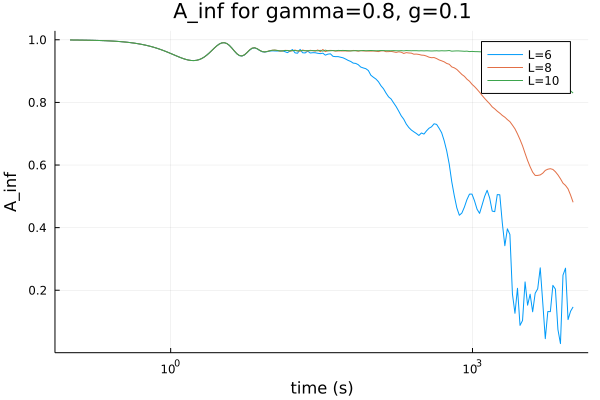

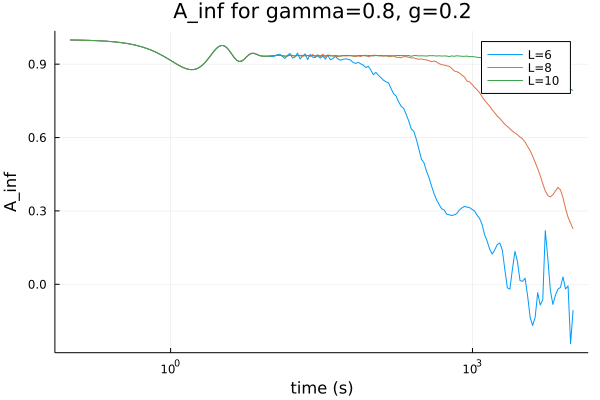

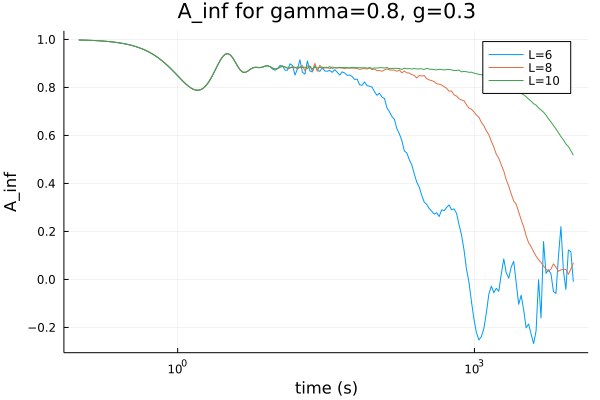

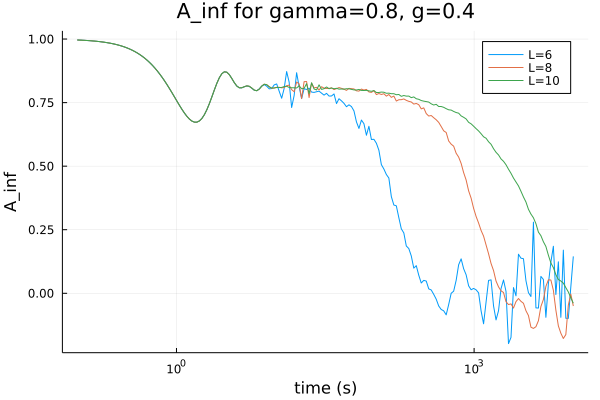

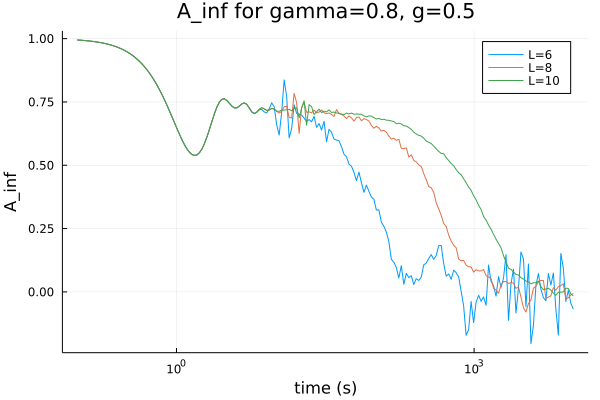

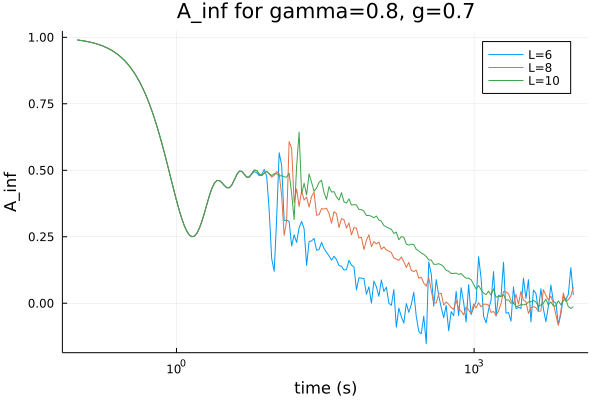

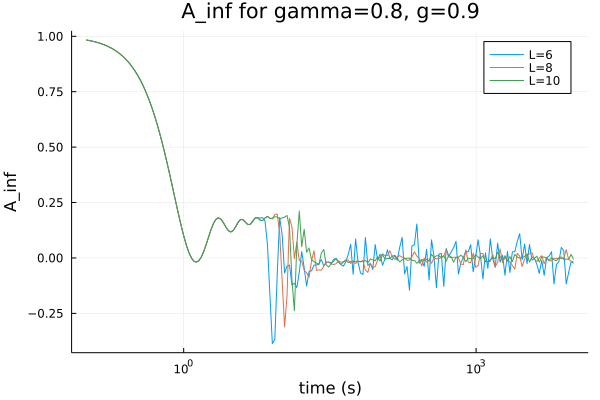

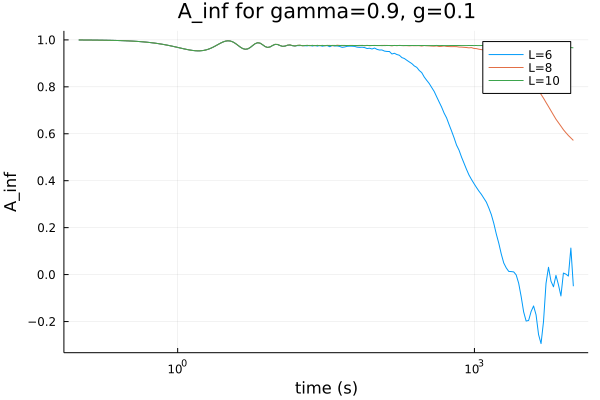

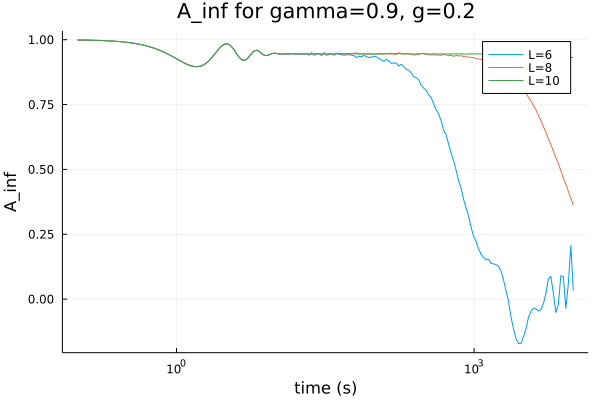

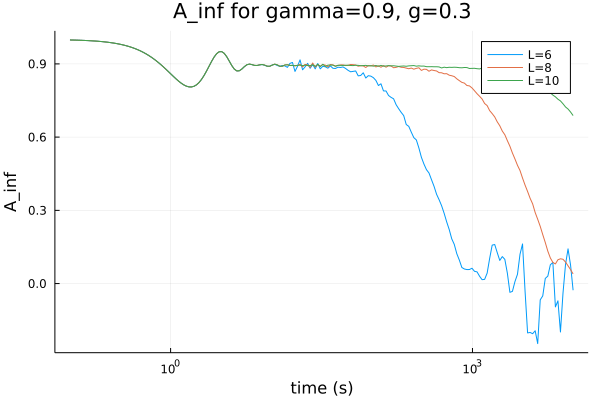

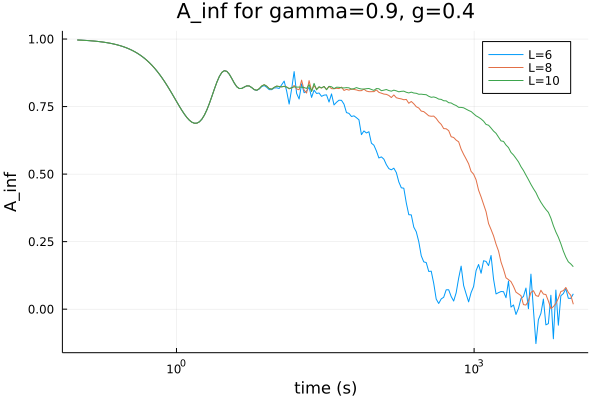

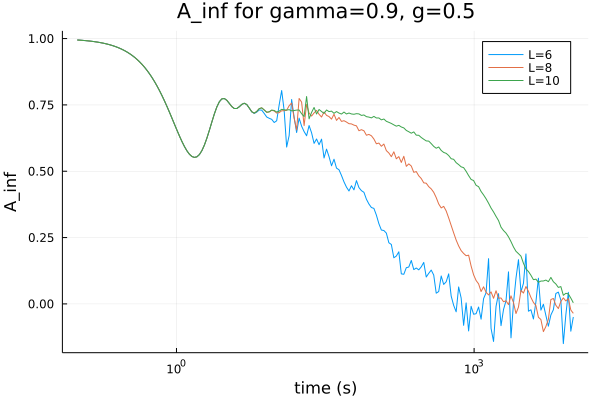

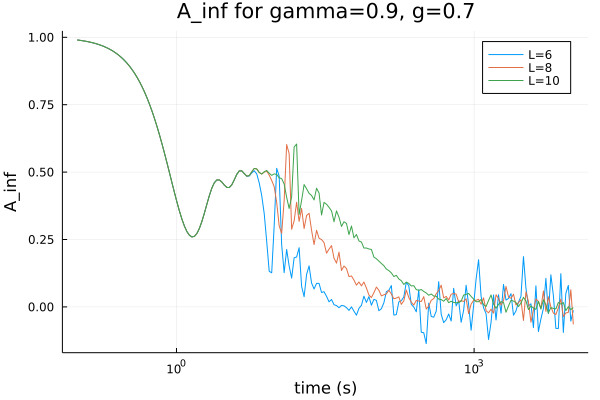

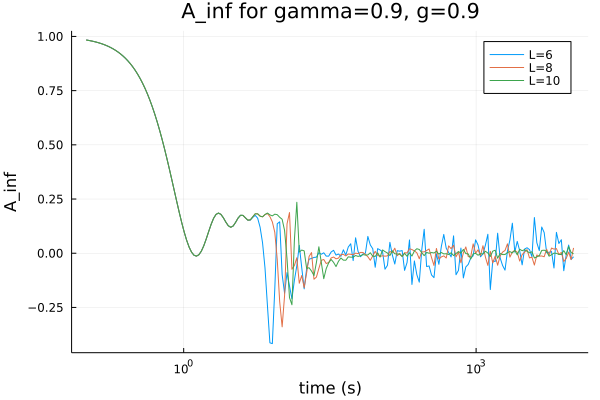

In [14]:
L_list_test = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
L_list_test = [ 6, 8, 10]
jz_interested = jz_list[1]
gamma_interested = gamma_list
g_interested = g_list

jz = 0.1
jx = 1.0

Ls_plot = zeros( (length(L_list_test), length(Ainfs_dict[
                ( 2, jz, gamma_interested[1], g_interested[1])])) )

for (gamma_i, gamma) in enumerate(gamma_interested)
    for (g_i, g) in enumerate(g_interested)
        for (L_i, L) in enumerate(L_list_test)
            Ls_plot[L_i, :] = Ainfs_dict[( L, jz, gamma, g)]
        end
        display(
            Plots.plot( t_list, Ls_plot', xaxis=:log,
                xlabel="time (s)", ylabel="A_inf",
                title="A_inf for gamma="*string(gamma)*", g="*string(g), 
                label = "L=".*string.(L_list_test'))
#             hline!([exp(-1)], linestyle=:dash, color=:black, label="")
            )
        
    end
end